In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Picking up the data

### Getting the data as Time series format

In [19]:
ts_rose=pd.read_csv('D:\\ANALYTICS\\GREAT LEARNING\\34. Time Series-Week-4\\Rose.csv',parse_dates=True,index_col=0,squeeze=True)
ts_spark=pd.read_csv('D:\\ANALYTICS\\GREAT LEARNING\\34. Time Series-Week-4\\Sparkling.csv',parse_dates=True,index_col=0,squeeze=True)

In [5]:
ts_rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


**We could see there are 2 missing values, we could find the nature of data and then use methods to treat the missing value**

In [6]:
ts_spark.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


----

## EDA

### Plot of 2 different wines and find the nature of the various time series components

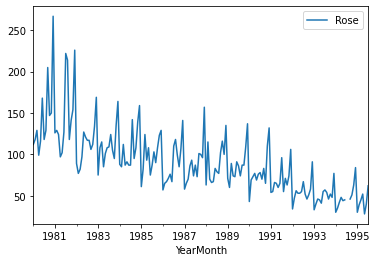

In [7]:
ts_rose.plot()

**We could see there dwindle down of sales of 'Rose' wine as the time passes,also we could see from the graph there might be a  multiplicative seasonality component present in the time series.**

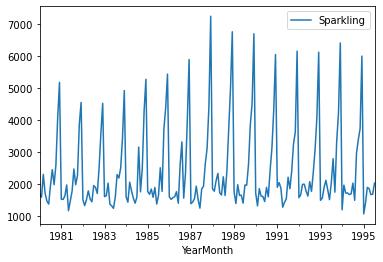

In [9]:
ts_spark.plot()

**For 'Sparkling' wine, we are unable to see obvious trend but some sort of seasonality present in the data,we could go for data decomposition to confirm the same.**

**Imputing missing value using interpolate,since price is non-linear we use method='time' or method='spline',here we use the former**

In [13]:
print('Before')
print(ts_rose[172:178])

Before
            Rose
YearMonth       
1994-05-01  44.0
1994-06-01  45.0
1994-07-01   NaN
1994-08-01   NaN
1994-09-01  46.0
1994-10-01  51.0


In [20]:
ts_rose.interpolate(method='time',inplace=True)

In [21]:
print('After')
print(ts_rose[172:178])

After
YearMonth
1994-05-01    44.000000
1994-06-01    45.000000
1994-07-01    45.326087
1994-08-01    45.663043
1994-09-01    46.000000
1994-10-01    51.000000
Name: Rose, dtype: float64


**Seasonal Decomposition**

In [22]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

**Employing Additive Seasonity**

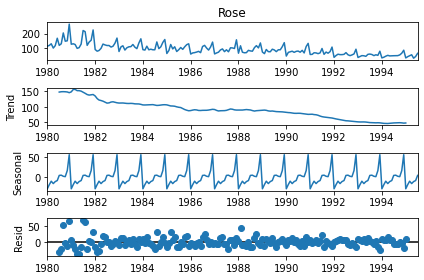

In [26]:
decomp_rose_add=seasonal_decompose(ts_rose,model='additive')
decomp_rose_add.plot();

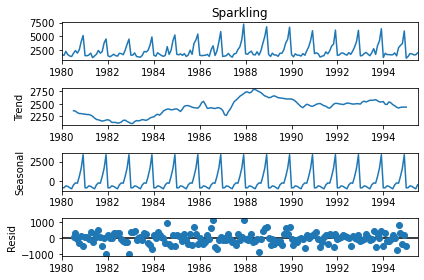

In [27]:
decomp_spark_add=seasonal_decompose(ts_spark,model='additive')
decomp_spark_add.plot();

**Multiplicative Seasonality**

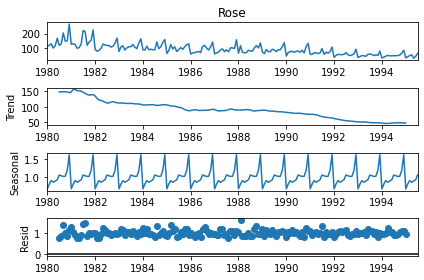

In [28]:
decomp_rose_mul=seasonal_decompose(ts_rose,model='multiplicative')
decomp_rose_mul.plot();

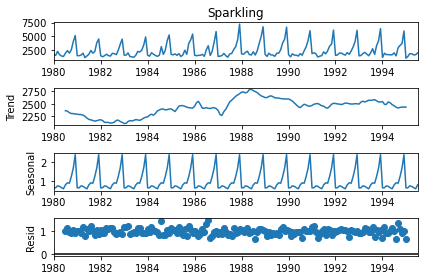

In [29]:
decomp_spark_mul=seasonal_decompose(ts_spark,model='multiplicative')
decomp_spark_mul.plot();

**We could see 'multiplicative model' describes seasnality well having residual component within range of (0,1),Rose wine shows downward trend while there is no generic trend seen in Sparkling wine.**

**Monthly boxplot for Wine Prices**

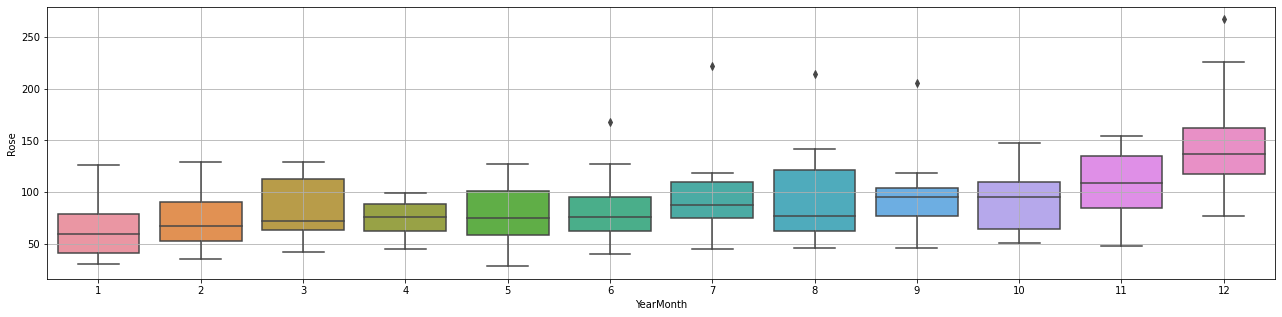

In [31]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(ts_rose.index.month, ts_rose, ax=ax,whis=1.5)
plt.grid();

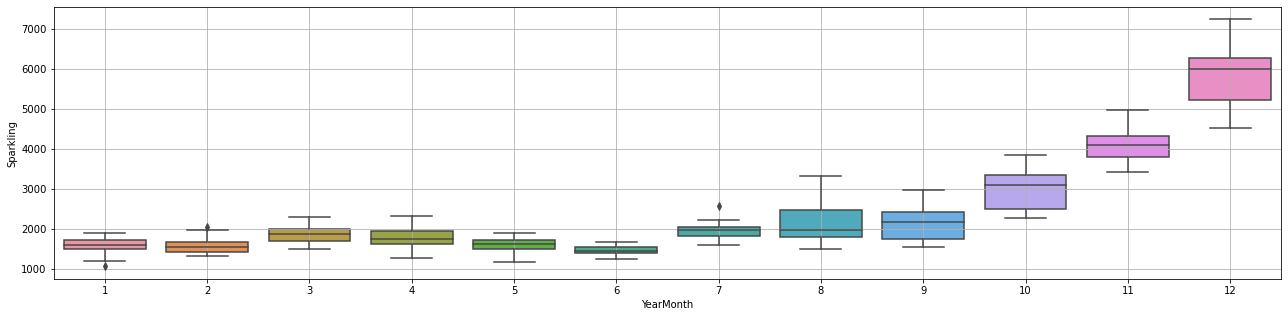

In [33]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(ts_spark.index.month, ts_spark, ax=ax,whis=1.5)
plt.grid();

**There is a presence of outlier in both wines, as well as average price of the wine for 12th month for each year is high compared to all other months.**

**Yearly plot**

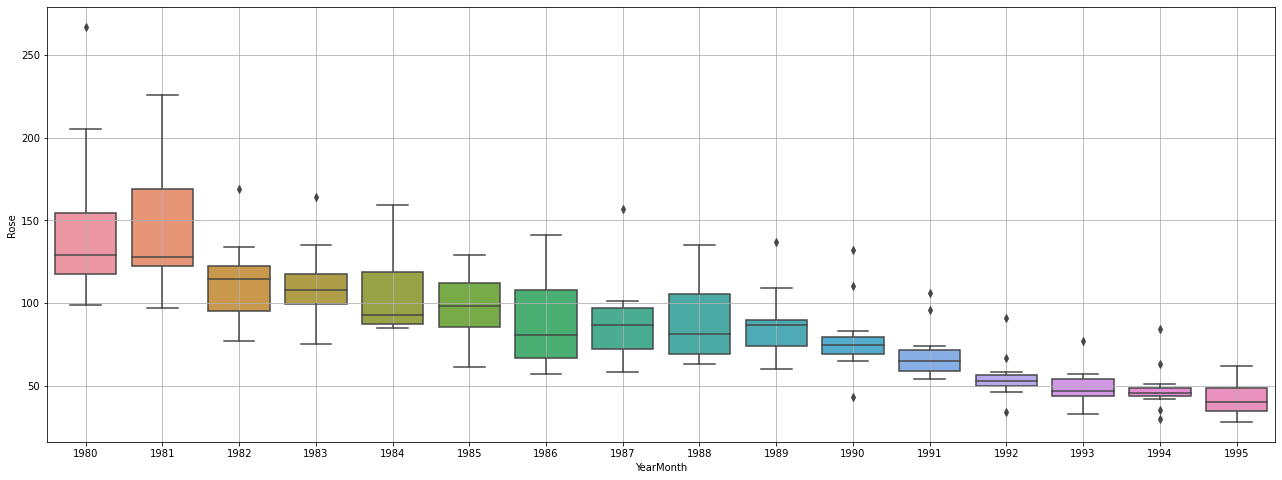

In [35]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(ts_rose.index.year, ts_rose, ax=ax,whis=1.5)
plt.grid();

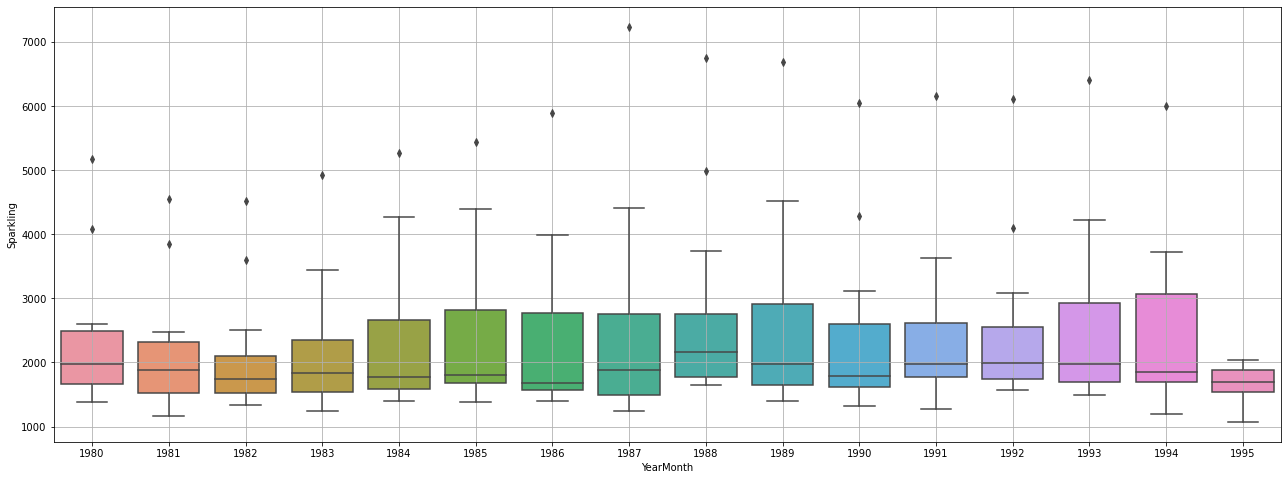

In [36]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(ts_spark.index.year, ts_spark, ax=ax,whis=1.5)
plt.grid();

**We could see outliers present in almost all of the years and as explained earlier trend component evident from Rose wine data while not so in Sparkling price data.**

In [50]:
ts_rose.describe()

count    187.000000
mean      89.914380
std       39.238391
min       28.000000
25%       62.500000
50%       85.000000
75%      111.000000
max      267.000000
Name: Rose, dtype: float64

In [51]:
ts_spark.describe()

count     187.000000
mean     2402.417112
std      1295.111540
min      1070.000000
25%      1605.000000
50%      1874.000000
75%      2549.000000
max      7242.000000
Name: Sparkling, dtype: float64

In [ ]:
df_rose=pd.read_csv('D:\\ANALYTICS\\GREAT LEARNING\\34. Time Series-Week-4\\Rose.csv',parse_dates=True,index_col=0)
df_spark=pd.read_csv('D:\\ANALYTICS\\GREAT LEARNING\\34. Time Series-Week-4\\Sparkling.csv',parse_dates=True,index_col=0)

In [53]:
yearly_sales_across_months_rose = pd.pivot_table(df_rose, values = 'Rose', columns = df_rose.index.month, 
                                        index = df_rose.index.year)

yearly_sales_across_months_rose

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


Text(0.5, 1.0, 'Rose')

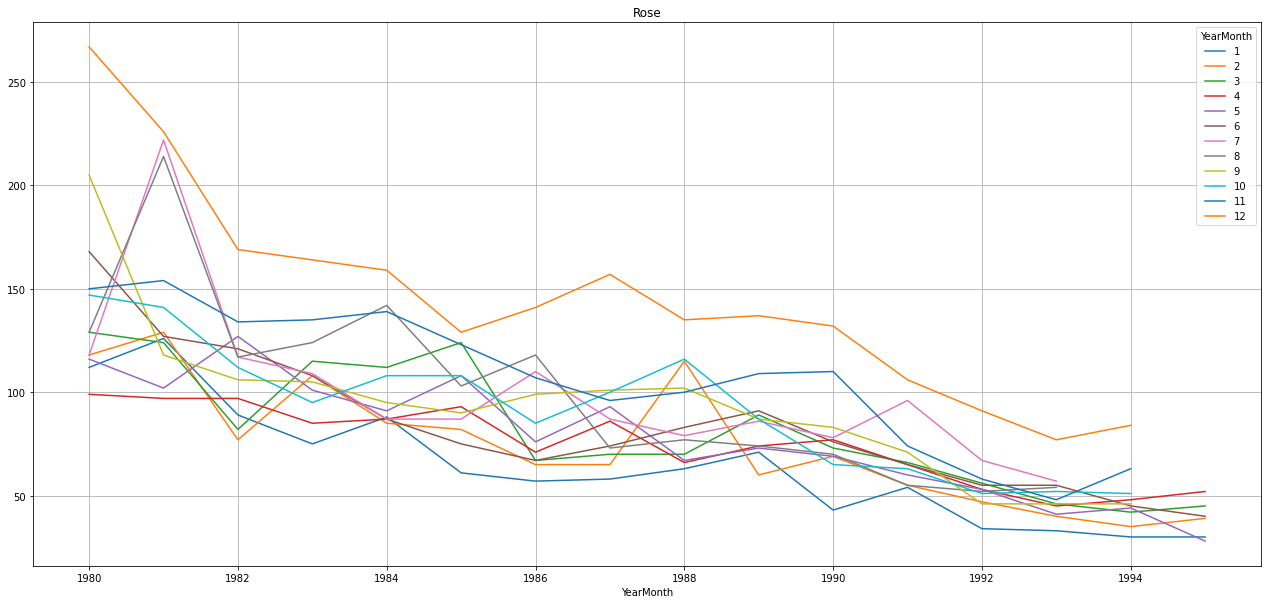

In [57]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months_rose.plot(ax=ax)
plt.grid();
plt.title('Rose')

In [55]:
yearly_sales_across_months_spark = pd.pivot_table(df_spark, values = 'Sparkling', columns = df_spark.index.month, 
                                        index = df_spark.index.year)

yearly_sales_across_months_spark

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


Text(0.5, 1.0, 'Sparkling')

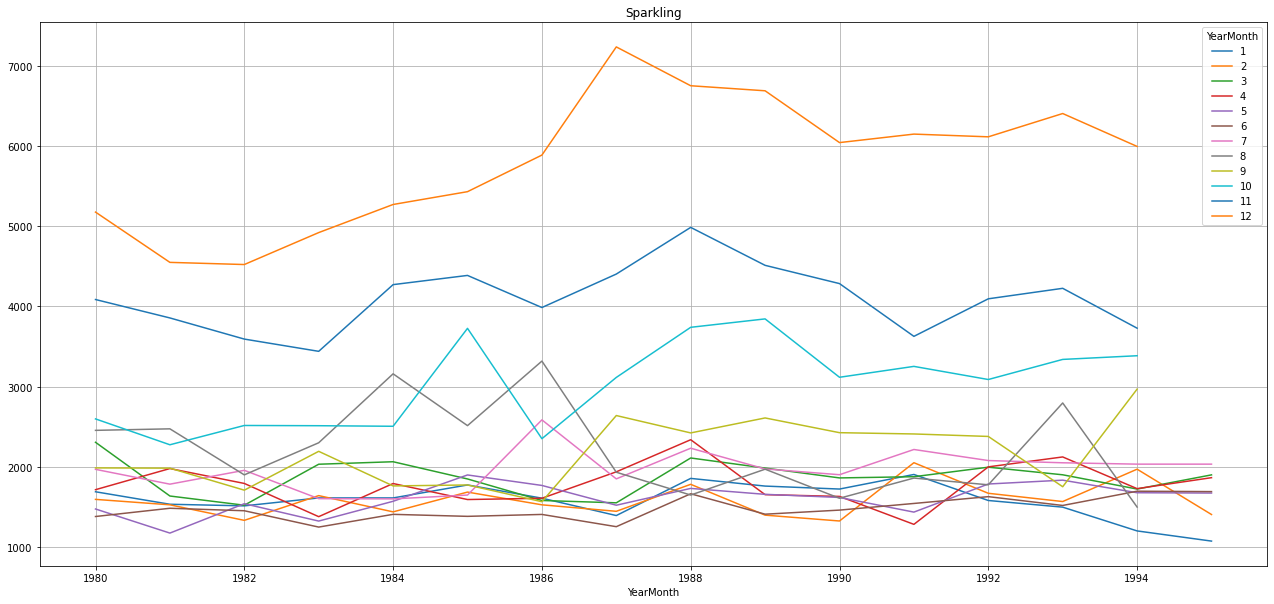

In [59]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months_spark.plot(ax=ax)
plt.grid();
plt.title('Sparkling')

----

### Splitting data into test and train

In [78]:
train_rose=pd.Series(ts_rose[0:132],ts_rose.index[0:132],name='Rose')
test_rose=pd.Series(ts_rose[132:],ts_rose.index[132:],name='Rose')
test_rose.head()

YearMonth
1991-01-01    54.0
1991-02-01    55.0
1991-03-01    66.0
1991-04-01    65.0
1991-05-01    60.0
Name: Rose, dtype: float64

In [82]:
train_spark=pd.Series(ts_spark[0:132],ts_spark.index[0:132],name='Sparkling')
test_spark=pd.Series(ts_spark[132:],ts_spark.index[132:],name='Sparkling')
test_spark.head()

YearMonth
1991-01-01    1902
1991-02-01    2049
1991-03-01    1874
1991-04-01    1279
1991-05-01    1432
Name: Sparkling, dtype: int64

In [80]:
train_rose=pd.DataFrame(train_rose,index=train_rose.index,columns=['Rose'])
test_rose=pd.DataFrame(test_rose,index=test_rose.index,columns=['Rose'])
test_rose.head()

,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


In [83]:
train_spark=pd.DataFrame(train_spark,index=train_spark.index,columns=['Sparkling'])
test_spark=pd.DataFrame(test_spark,index=test_spark.index,columns=['Sparkling'])
test_spark.head()

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


In [116]:
#train_time = [i+1 for i in range(len(train_rose))]
#test_time = [i+133 for i in range(len(test_rose))]
train_time = train_rose.index
train_time  = train_time.astype(np.int64) // 10**9
test_time = test_rose.index
test_time  = test_time.astype(np.int64) // 10**9

In [117]:
train_spark['Time']=train_time
test_spark['Time']=test_time
test_spark.head()

,Sparkling,Time
YearMonth,,
1991-01-01,1902,662688000
1991-02-01,2049,665366400
1991-03-01,1874,667785600
1991-04-01,1279,670464000
1991-05-01,1432,673056000


In [104]:
train_rose['Time']=train_time
test_rose['Time']=test_time
test_rose.head()

,Rose,Time
YearMonth,,
1991-01-01,54.0,133
1991-02-01,55.0,134
1991-03-01,66.0,135
1991-04-01,65.0,136
1991-05-01,60.0,137


--------

### Building Various model and evaluating using RMSE

#### Model 1:Linear Regression

In [114]:
LinearRegression_train_rose.head()

,Rose,Time,RegOnTime
YearMonth,,,
1980-01-01,112.0,1,2021.741171
1980-02-01,118.0,2,2027.573830
1980-03-01,129.0,3,2033.406488
1980-04-01,99.0,4,2039.239147
1980-05-01,116.0,5,2045.071805


In [113]:
LinearRegression_test_rose.head()

,Rose,Time,RegOnTime
YearMonth,,,
1991-01-01,54.0,133,2791.652093
1991-02-01,55.0,134,2797.484752
1991-03-01,66.0,135,2803.317410
1991-04-01,65.0,136,2809.150069
1991-05-01,60.0,137,2814.982727


In [356]:
LinearRegression_train_rose = train_rose.copy()
LinearRegression_test_rose = test_rose.copy()

In [357]:
LinearRegression_train_spark = train_spark.copy()
LinearRegression_test_spark = test_spark.copy()

In [358]:
train_rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
 1   Time    132 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.1 KB


In [108]:
from sklearn.linear_model import LinearRegression

In [359]:
lr = LinearRegression()

In [360]:
lr.fit(LinearRegression_train_rose[['Time']],LinearRegression_train_rose['Rose'].values)
lr.fit(LinearRegression_train_spark[['Time']],LinearRegression_train_spark['Sparkling'].values)

LinearRegression()

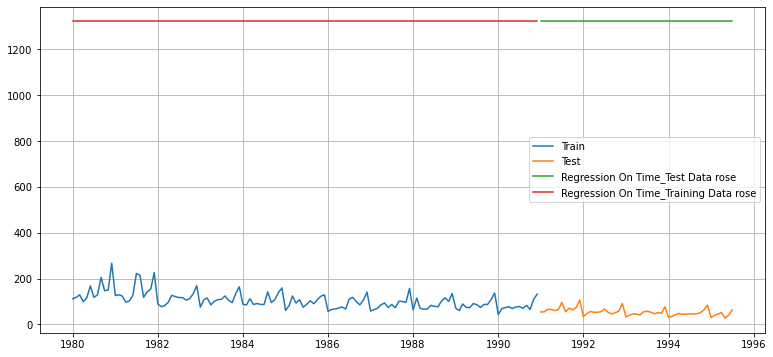

In [361]:
train_predictions_model1_rose         = lr.predict(LinearRegression_train_rose[['Time']])
LinearRegression_train_rose['RegOnTime'] = train_predictions_model1_rose

test_predictions_model1_rose         = lr.predict(LinearRegression_test_rose[['Time']])
LinearRegression_test_rose['RegOnTime'] = test_predictions_model1_rose

plt.figure(figsize=(13,6))
plt.plot( train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(LinearRegression_test_rose['RegOnTime'], label='Regression On Time_Test Data rose')
plt.plot(LinearRegression_train_rose['RegOnTime'], label='Regression On Time_Training Data rose')
plt.legend(loc='best')
plt.grid();

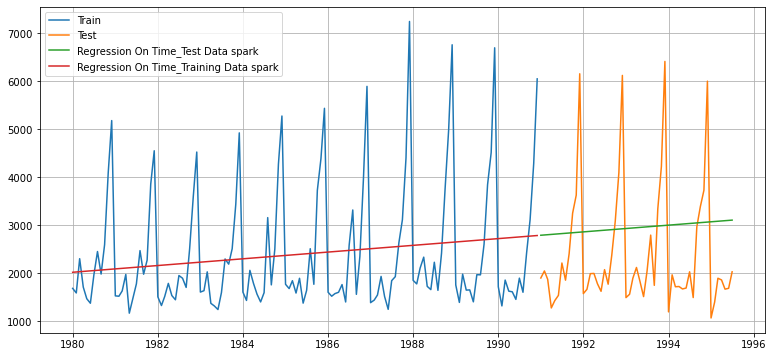

In [362]:
train_predictions_model1_spark         = lr.predict(LinearRegression_train_spark[['Time']])
LinearRegression_train_spark['RegOnTime'] = train_predictions_model1_spark

test_predictions_model1_spark         = lr.predict(LinearRegression_test_spark[['Time']])
LinearRegression_test_spark['RegOnTime'] = test_predictions_model1_spark

plt.figure(figsize=(13,6))
plt.plot( train_spark['Sparkling'], label='Train')
plt.plot(test_spark['Sparkling'], label='Test')
plt.plot(LinearRegression_test_spark['RegOnTime'], label='Regression On Time_Test Data spark')
plt.plot(LinearRegression_train_spark['RegOnTime'], label='Regression On Time_Training Data spark')
plt.legend(loc='best')
plt.grid();

In [119]:
from sklearn import metrics

In [363]:
rmse_model1_train_rose = metrics.mean_squared_error(train_rose['Rose'],train_predictions_model1_rose,squared=False)
rmse_model1_train_spark = metrics.mean_squared_error(train_spark['Sparkling'],train_predictions_model1_spark,squared=False)

In [364]:
rmse_model1_test_rose = metrics.mean_squared_error(test_rose['Rose'],test_predictions_model1_rose,squared=False)
rmse_model1_test_spark = metrics.mean_squared_error(test_spark['Sparkling'],test_predictions_model1_spark,squared=False)

In [365]:
resultsDf_rose1 = pd.DataFrame({'Test RMSE-Rose Data': [rmse_model1_test_rose]},index=['RegressionOnTime'])
resultsDf_rose1

,Test RMSE-Rose Data
RegressionOnTime,1267.516575


In [366]:
resultsDf_spark1 = pd.DataFrame({'Test RMSE-Spark Data': [rmse_model1_test_spark]},index=['RegressionOnTime'])
resultsDf_spark1

,Test RMSE-Spark Data
RegressionOnTime,1389.249047


### Model 2 Naive Approach

In [367]:
NaiveModel_train_rose = train_rose.copy()
NaiveModel_test_rose = test_rose.copy()

In [368]:
NaiveModel_train_spark = train_spark.copy()
NaiveModel_test_spark = test_spark.copy()

In [369]:
## Let us get the last value (or the most recent value) of the training set.

NaiveModel_train_rose['naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
train_predictions_model2_rose=NaiveModel_train_rose['naive']
NaiveModel_train_rose['naive'].head()

YearMonth
1980-01-01    132.0
1980-02-01    132.0
1980-03-01    132.0
1980-04-01    132.0
1980-05-01    132.0
Name: naive, dtype: float64

In [370]:
NaiveModel_train_spark['naive'] = np.asarray(train_spark['Sparkling'])[len(np.asarray(train_spark['Sparkling']))-1]
train_predictions_model2_spark=NaiveModel_train_spark['naive']
NaiveModel_train_spark['naive'].head()

YearMonth
1980-01-01    6047
1980-02-01    6047
1980-03-01    6047
1980-04-01    6047
1980-05-01    6047
Name: naive, dtype: int64

In [371]:
NaiveModel_test_rose['naive'] = np.asarray(test_rose['Rose'])[len(np.asarray(test_rose['Rose']))-1]
test_predictions_model2_rose=NaiveModel_test_rose['naive']
NaiveModel_test_rose['naive'].head()

YearMonth
1991-01-01    62.0
1991-02-01    62.0
1991-03-01    62.0
1991-04-01    62.0
1991-05-01    62.0
Name: naive, dtype: float64

In [372]:
NaiveModel_test_spark['naive'] = np.asarray(test_spark['Sparkling'])[len(np.asarray(test_spark['Sparkling']))-1]
test_predictions_model2_spark=NaiveModel_test_spark['naive']
NaiveModel_test_spark['naive'].head()

YearMonth
1991-01-01    2031
1991-02-01    2031
1991-03-01    2031
1991-04-01    2031
1991-05-01    2031
Name: naive, dtype: int64

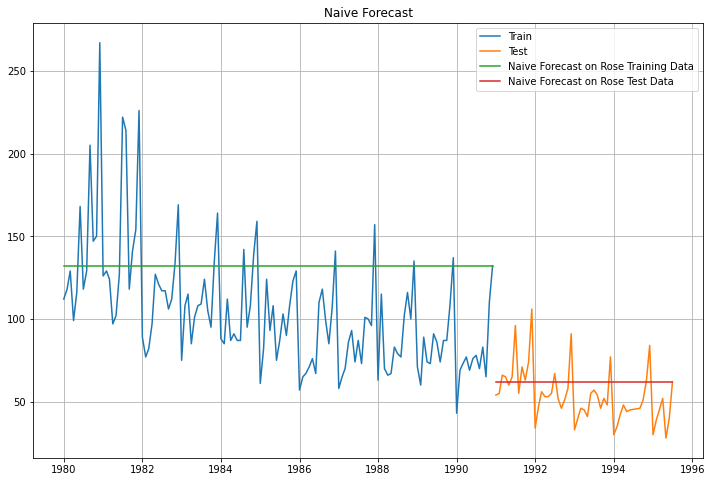

In [373]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(NaiveModel_train_rose['naive'], label='Naive Forecast on Rose Training Data')
plt.plot(NaiveModel_test_rose['naive'], label='Naive Forecast on Rose Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

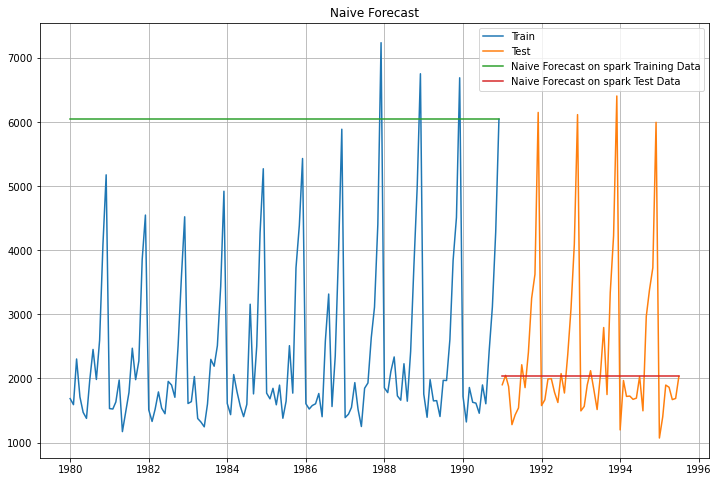

In [374]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train_spark['Sparkling'], label='Train')
plt.plot(test_spark['Sparkling'], label='Test')
plt.plot(NaiveModel_train_spark['naive'], label='Naive Forecast on spark Training Data')
plt.plot(NaiveModel_test_spark['naive'], label='Naive Forecast on spark Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [375]:
rmse_model2_train_rose = metrics.mean_squared_error(train_rose['Rose'],train_predictions_model2_rose,squared=False)
rmse_model2_train_spark = metrics.mean_squared_error(train_spark['Sparkling'],train_predictions_model2_spark,squared=False)

In [376]:
rmse_model2_test_rose = metrics.mean_squared_error(test_rose['Rose'],test_predictions_model2_rose,squared=False)
rmse_model2_test_spark = metrics.mean_squared_error(test_spark['Sparkling'],test_predictions_model2_spark,squared=False)

In [377]:
resultsDf_rose2=pd.DataFrame({'Test RMSE-Rose Data': [rmse_model2_test_rose]},index=['Naive'])

resultsDf_rose = pd.concat([resultsDf_rose1, resultsDf_rose2])
resultsDf_rose

,Test RMSE-Rose Data
RegressionOnTime,1267.516575
Naive,17.740511


In [378]:
resultsDf_spark2=pd.DataFrame({'Test RMSE-Spark Data': [rmse_model2_test_spark]},index=['Naive'])
resultsDf_spark = pd.concat([resultsDf_spark1, resultsDf_spark2])
resultsDf_spark

,Test RMSE-Spark Data
RegressionOnTime,1389.249047
Naive,1327.156057


### Model 3 Simple Average

In [155]:
SimpleAvg_train_rose = train_rose.copy()
SimpleAvg_test_rose = test_rose.copy()

In [156]:
SimpleAvg_train_spark = train_spark.copy()
SimpleAvg_test_spark = test_spark.copy()

In [379]:
## Let us get the last value (or the most recent value) of the training set.

SimpleAvg_train_rose['mean'] = train_rose['Rose'].mean()
train_predictions_model3_rose=SimpleAvg_train_rose['mean']
SimpleAvg_train_rose['mean'].head()

YearMonth
1980-01-01    104.939394
1980-02-01    104.939394
1980-03-01    104.939394
1980-04-01    104.939394
1980-05-01    104.939394
Name: mean, dtype: float64

In [380]:
SimpleAvg_train_spark['mean'] = train_spark['Sparkling'].mean()
train_predictions_model3_spark=SimpleAvg_train_spark['mean']
SimpleAvg_train_spark['mean'].head()

YearMonth
1980-01-01    2403.780303
1980-02-01    2403.780303
1980-03-01    2403.780303
1980-04-01    2403.780303
1980-05-01    2403.780303
Name: mean, dtype: float64

In [381]:
SimpleAvg_test_rose['mean'] = test_rose['Rose'].mean()
test_predictions_model3_rose=SimpleAvg_test_rose['mean']
SimpleAvg_test_rose['mean'].head()

YearMonth
1991-01-01    53.854348
1991-02-01    53.854348
1991-03-01    53.854348
1991-04-01    53.854348
1991-05-01    53.854348
Name: mean, dtype: float64

In [382]:
SimpleAvg_test_spark['mean'] = test_spark['Sparkling'].mean()
test_predictions_model3_spark=SimpleAvg_test_spark['mean']
SimpleAvg_test_spark['mean'].head()

YearMonth
1991-01-01    2399.145455
1991-02-01    2399.145455
1991-03-01    2399.145455
1991-04-01    2399.145455
1991-05-01    2399.145455
Name: mean, dtype: float64

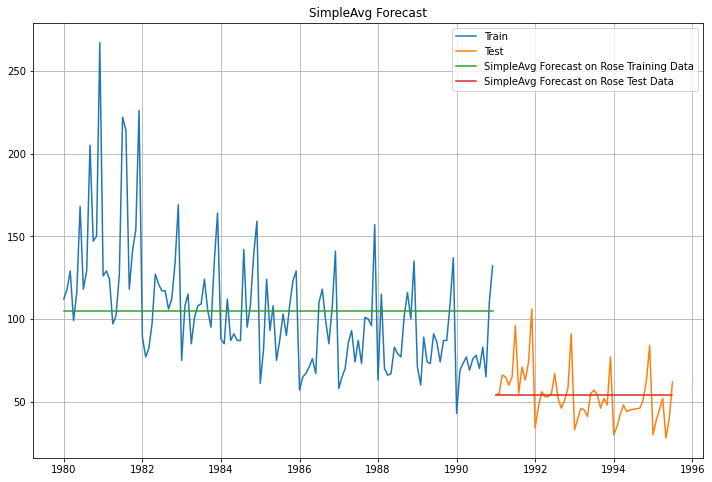

In [383]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAvg_train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(SimpleAvg_train_rose['mean'], label='SimpleAvg Forecast on Rose Training Data')
plt.plot(SimpleAvg_test_rose['mean'], label='SimpleAvg Forecast on Rose Test Data')
plt.legend(loc='best')
plt.title("SimpleAvg Forecast")
plt.grid();

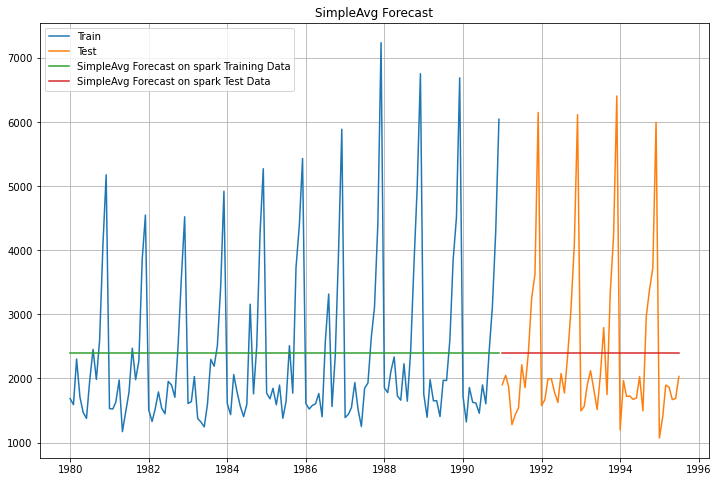

In [384]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAvg_train_spark['Sparkling'], label='Train')
plt.plot(test_spark['Sparkling'], label='Test')
plt.plot(SimpleAvg_train_spark['mean'], label='SimpleAvg Forecast on spark Training Data')
plt.plot(SimpleAvg_test_spark['mean'], label='SimpleAvg Forecast on spark Test Data')
plt.legend(loc='best')
plt.title("SimpleAvg Forecast")
plt.grid();

In [385]:
rmse_model3_train_rose = metrics.mean_squared_error(train_rose['Rose'],train_predictions_model3_rose,squared=False)
rmse_model3_train_spark = metrics.mean_squared_error(train_spark['Sparkling'],train_predictions_model3_spark,squared=False)

In [386]:
rmse_model3_test_rose = metrics.mean_squared_error(test_rose['Rose'],test_predictions_model3_rose,squared=False)
rmse_model3_test_spark = metrics.mean_squared_error(test_spark['Sparkling'],test_predictions_model3_spark,squared=False)

In [387]:
resultsDf_rose3=pd.DataFrame({'Test RMSE-Rose Data': [rmse_model3_test_rose]},index=['SimpleAvg'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_rose3])
resultsDf_rose

,Test RMSE-Rose Data
RegressionOnTime,1267.516575
Naive,17.740511
SimpleAvg,15.759889


In [388]:
resultsDf_spark3=pd.DataFrame({'Test RMSE-Spark Data': [rmse_model3_test_spark]},index=['SimpleAvg'])
resultsDf_spark = pd.concat([resultsDf_spark, resultsDf_spark3])
resultsDf_spark

,Test RMSE-Spark Data
RegressionOnTime,1389.249047
Naive,1327.156057
SimpleAvg,1275.073380


### Model 4: Moving Average

In [389]:
MovingAvg_ts_rose = pd.DataFrame(ts_rose,index=ts_rose.index,columns=['Rose'])
MovingAvg_ts_rose.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [390]:
MovingAvg_ts_spark = pd.DataFrame(ts_spark,index=ts_spark.index,columns=['Sparkling'])
MovingAvg_ts_spark.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [391]:

MovingAvg_ts_rose['Trailing_2'] = MovingAvg_ts_rose['Rose'].rolling(2).mean()
MovingAvg_ts_rose['Trailing_4'] = MovingAvg_ts_rose['Rose'].rolling(4).mean()
MovingAvg_ts_rose['Trailing_6'] = MovingAvg_ts_rose['Rose'].rolling(6).mean()
MovingAvg_ts_rose['Trailing_9'] = MovingAvg_ts_rose['Rose'].rolling(9).mean()

MovingAvg_ts_rose.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


In [392]:

MovingAvg_ts_spark['Trailing_2'] = MovingAvg_ts_spark['Sparkling'].rolling(2).mean()
MovingAvg_ts_spark['Trailing_4'] = MovingAvg_ts_spark['Sparkling'].rolling(4).mean()
MovingAvg_ts_spark['Trailing_6'] = MovingAvg_ts_spark['Sparkling'].rolling(6).mean()
MovingAvg_ts_spark['Trailing_9'] = MovingAvg_ts_spark['Sparkling'].rolling(9).mean()

MovingAvg_ts_spark.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


In [393]:
SimpleAvg_train_spark['mean'] = train_spark['Sparkling'].mean()
train_predictions_model3_spark=SimpleAvg_train_spark['mean']
SimpleAvg_train_spark['mean'].head()

YearMonth
1980-01-01    2403.780303
1980-02-01    2403.780303
1980-03-01    2403.780303
1980-04-01    2403.780303
1980-05-01    2403.780303
Name: mean, dtype: float64

In [394]:
trailing_MovingAverage_train_rose=MovingAvg_ts_rose[0:132] 
trailing_MovingAverage_test_rose=MovingAvg_ts_rose[132:]

In [395]:
trailing_MovingAverage_train_spark=MovingAvg_ts_spark[0:132] 
trailing_MovingAverage_test_spark=MovingAvg_ts_spark[132:]

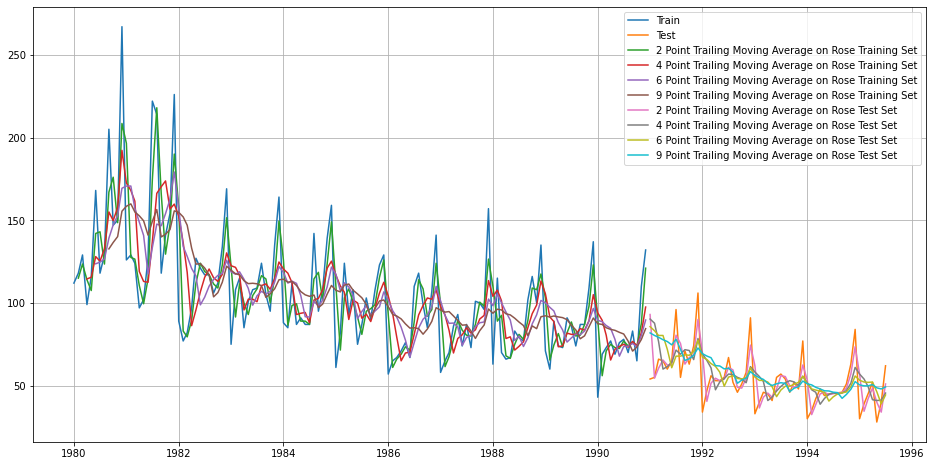

In [396]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train_rose['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test_rose['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train_rose['Trailing_2'], label='2 Point Trailing Moving Average on Rose Training Set')
plt.plot(trailing_MovingAverage_train_rose['Trailing_4'], label='4 Point Trailing Moving Average on Rose Training Set')
plt.plot(trailing_MovingAverage_train_rose['Trailing_6'],label = '6 Point Trailing Moving Average on Rose Training Set')
plt.plot(trailing_MovingAverage_train_rose['Trailing_9'],label = '9 Point Trailing Moving Average on Rose Training Set')

plt.plot(trailing_MovingAverage_test_rose['Trailing_2'], label='2 Point Trailing Moving Average on Rose Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_4'], label='4 Point Trailing Moving Average on Rose Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_6'],label = '6 Point Trailing Moving Average on Rose Test Set')
plt.plot(trailing_MovingAverage_test_rose['Trailing_9'],label = '9 Point Trailing Moving Average on Rose Test Set')
plt.legend(loc = 'best')
plt.grid();

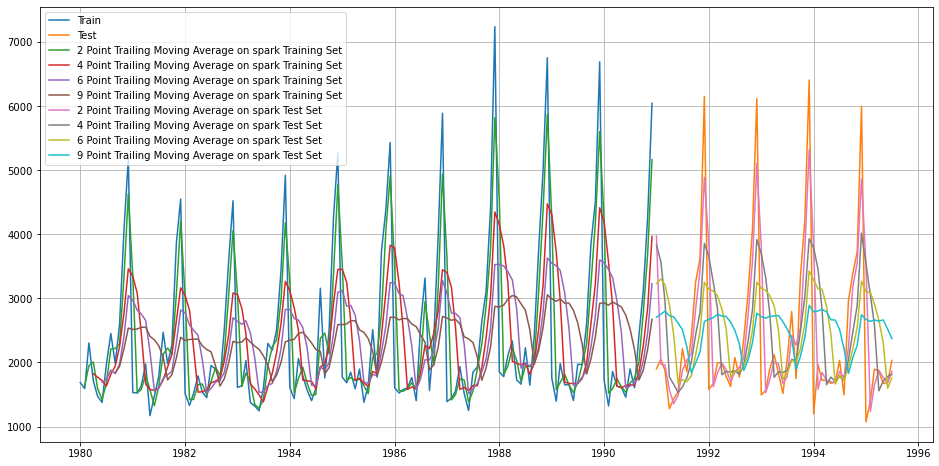

In [397]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train_spark['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test_spark['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train_spark['Trailing_2'], label='2 Point Trailing Moving Average on spark Training Set')
plt.plot(trailing_MovingAverage_train_spark['Trailing_4'], label='4 Point Trailing Moving Average on spark Training Set')
plt.plot(trailing_MovingAverage_train_spark['Trailing_6'],label = '6 Point Trailing Moving Average on spark Training Set')
plt.plot(trailing_MovingAverage_train_spark['Trailing_9'],label = '9 Point Trailing Moving Average on spark Training Set')

plt.plot(trailing_MovingAverage_test_spark['Trailing_2'], label='2 Point Trailing Moving Average on spark Test Set')
plt.plot(trailing_MovingAverage_test_spark['Trailing_4'], label='4 Point Trailing Moving Average on spark Test Set')
plt.plot(trailing_MovingAverage_test_spark['Trailing_6'],label = '6 Point Trailing Moving Average on spark Test Set')
plt.plot(trailing_MovingAverage_test_spark['Trailing_9'],label = '9 Point Trailing Moving Average on spark Test Set')
plt.legend(loc = 'best')
plt.grid();

In [398]:
rmse_model4_test_rose2 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_2'],squared=False)
rmse_model4_test_rose4 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_4'],squared=False)
rmse_model4_test_rose6 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_6'],squared=False)
rmse_model4_test_rose9 = metrics.mean_squared_error(test_rose['Rose'],trailing_MovingAverage_test_rose['Trailing_9'],squared=False)

In [399]:
rmse_model4_test_spark2 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test_spark['Trailing_2'],squared=False)
rmse_model4_test_spark4 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test_spark['Trailing_4'],squared=False)
rmse_model4_test_spark6 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test_spark['Trailing_6'],squared=False)
rmse_model4_test_spark9 = metrics.mean_squared_error(test_spark['Sparkling'],trailing_MovingAverage_test_spark['Trailing_9'],squared=False)

In [400]:
resultsDf_rose4=pd.DataFrame({'Test RMSE-Rose Data': [rmse_model4_test_rose2,rmse_model4_test_rose4,rmse_model4_test_rose6,\
                             rmse_model4_test_rose9]},index=['2pointTrailingMovingAverageRose','4pointTrailingMovingAverageRose'
                                   ,'6pointTrailingMovingAverageRose','9pointTrailingMovingAverageRose'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_rose4])
resultsDf_rose

,Test RMSE-Rose Data
RegressionOnTime,1267.516575
Naive,17.740511
SimpleAvg,15.759889
2pointTrailingMovingAverageRose,11.529278
4pointTrailingMovingAverageRose,14.451433
6pointTrailingMovingAverageRose,14.566399
9pointTrailingMovingAverageRose,14.727667


In [401]:
resultsDf_spark4=pd.DataFrame({'Test RMSE-Spark Data': [rmse_model4_test_spark2,rmse_model4_test_spark4,rmse_model4_test_spark6,\
                             rmse_model4_test_spark9]},index=['2pointTrailingMovingAveragespark','4pointTrailingMovingAveragespark'
                                   ,'6pointTrailingMovingAveragespark','9pointTrailingMovingAveragespark'])

resultsDf_spark = pd.concat([resultsDf_spark, resultsDf_spark4])
resultsDf_spark

,Test RMSE-Spark Data
RegressionOnTime,1389.249047
Naive,1327.156057
SimpleAvg,1275.073380
2pointTrailingMovingAveragespark,813.400684
4pointTrailingMovingAveragespark,1156.589694
6pointTrailingMovingAveragespark,1283.927428
9pointTrailingMovingAveragespark,1346.278315


### Model 5: Simple Exponential Smoothing

In [193]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [194]:
SES_train_rose = train_rose.copy()
SES_test_rose = test_rose.copy()

In [195]:
SES_train_spark = train_spark.copy()
SES_test_spark = test_spark.copy()

In [197]:
import warnings
warnings.filterwarnings('ignore')

In [261]:
model_SES_rose = SimpleExpSmoothing(SES_train_rose['Rose'])
model_SES_autofit_rose = model_SES_rose.fit(optimized=True,use_brute=True)

In [262]:
model_SES_spark = SimpleExpSmoothing(SES_train_spark['Sparkling'])
model_SES_autofit_spark = model_SES_spark.fit(optimized=True,use_brute=True)

In [265]:
SES_train_rose['predict'] = model_SES_autofit_rose.fittedvalues
#SES_train_rose.drop(['Time'],inplace=True,axis=1)
SES_train_rose.head()

,Rose,predict
YearMonth,,
1980-01-01,112.0,134.387264
1980-02-01,118.0,132.176525
1980-03-01,129.0,130.776595
1980-04-01,99.0,130.601157
1980-05-01,116.0,127.480547


In [266]:
SES_train_spark['predict'] = model_SES_autofit_spark.fittedvalues
#SES_train_spark.drop(['Time'],inplace=True,axis=1)
SES_train_spark.head()

,Sparkling,predict
YearMonth,,
1980-01-01,1686,2403.790103
1980-02-01,1591,2403.790103
1980-03-01,2304,2403.790103
1980-04-01,1712,2403.790103
1980-05-01,1471,2403.790103


In [267]:
SES_test_rose['predict'] = model_SES_autofit_rose.forecast(steps=55)
#SES_test_rose.drop(['Time'],inplace=True,axis=1)
SES_test_rose.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,87.104998
1991-02-01,55.0,87.104998
1991-03-01,66.0,87.104998
1991-04-01,65.0,87.104998
1991-05-01,60.0,87.104998


In [268]:
SES_test_spark['predict'] = model_SES_autofit_spark.forecast(steps=55)
#SES_test_spark.drop(['Time'],inplace=True,axis=1)
SES_test_spark.head()

,Sparkling,predict
YearMonth,,
1991-01-01,1902,2403.790103
1991-02-01,2049,2403.790103
1991-03-01,1874,2403.790103
1991-04-01,1279,2403.790103
1991-05-01,1432,2403.790103


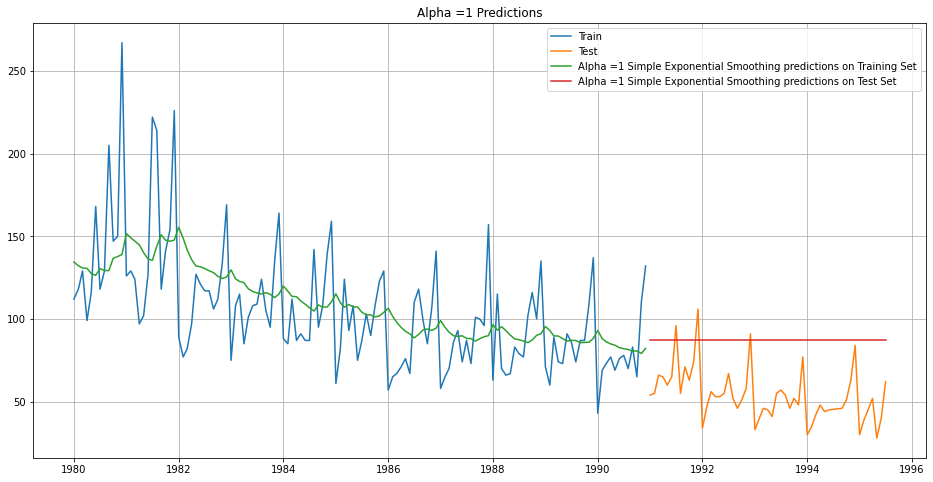

In [210]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train_rose['Rose'], label='Train')
plt.plot(SES_test_rose['Rose'], label='Test')

plt.plot(SES_train_rose['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test_rose['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =1 Predictions');

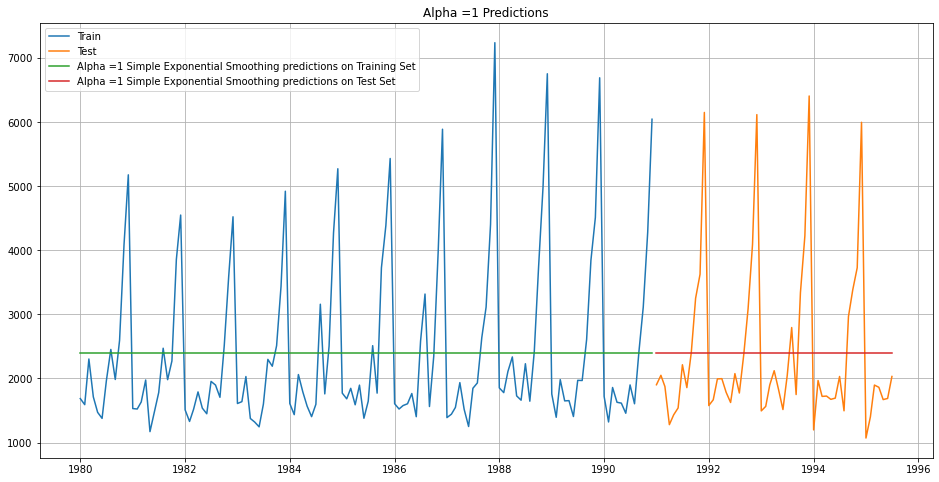

In [211]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train_spark['Sparkling'], label='Train')
plt.plot(SES_test_spark['Sparkling'], label='Test')

plt.plot(SES_train_spark['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test_spark['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =1 Predictions');

In [402]:
rmse_model5_test_rose1 = metrics.mean_squared_error(SES_test_rose['Rose'],SES_test_rose['predict'],squared=False)

In [403]:
resultsDf_rose5=pd.DataFrame({'Test RMSE-Rose Data': [rmse_model5_test_rose1]},index=['Alpha=1,SimpleExponentialSmoothing'])

In [404]:
resultsDf_rose =pd.concat([resultsDf_rose, resultsDf_rose5])

In [405]:
resultsDf_rose

,Test RMSE-Rose Data
RegressionOnTime,1267.516575
Naive,17.740511
SimpleAvg,15.759889
2pointTrailingMovingAverageRose,11.529278
4pointTrailingMovingAverageRose,14.451433
6pointTrailingMovingAverageRose,14.566399
9pointTrailingMovingAverageRose,14.727667
"Alpha=1,SimpleExponentialSmoothing",36.796465


In [406]:
rmse_model5_test_spark1 = metrics.mean_squared_error(SES_test_spark['Sparkling'],SES_test_spark['predict'],squared=False)

In [407]:
resultsDf_spark5=pd.DataFrame({'Test RMSE-Spark Data': [rmse_model5_test_spark1]},index=['Alpha=1,SimpleExponentialSmoothing'])

In [408]:
resultsDf_spark =pd.concat([resultsDf_spark, resultsDf_spark5])

In [409]:
resultsDf_spark

,Test RMSE-Spark Data
RegressionOnTime,1389.249047
Naive,1327.156057
SimpleAvg,1275.073380
2pointTrailingMovingAveragespark,813.400684
4pointTrailingMovingAveragespark,1156.589694
6pointTrailingMovingAveragespark,1283.927428
9pointTrailingMovingAveragespark,1346.278315
"Alpha=1,SimpleExponentialSmoothing",1275.081839


#### Setting different Alpha Values

In [281]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6_rose = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],
                                'Test RMSE': []})
resultsDf_6_rose

,Alpha Values,Train RMSE,Test RMSE


In [282]:
resultsDf_6_spark = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],
                                'Test RMSE': []})
resultsDf_6_spark

,Alpha Values,Train RMSE,Test RMSE


In [287]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i_rose = model_SES_rose.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train_rose['predict',i] = model_SES_alpha_i_rose.fittedvalues
    SES_test_rose['predict',i] = model_SES_alpha_i_rose.forecast(steps=55)
    
    rmse_model5_train_i_rose = metrics.mean_squared_error(SES_train_rose['Rose'],SES_train_rose['predict',i],squared=False)
    
    rmse_model5_test_i_rose = metrics.mean_squared_error(SES_test_rose['Rose'],SES_test_rose['predict',i],squared=False)
    
    resultsDf_6_rose = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i_rose 
                                      ,'Test RMSE':rmse_model5_test_i_rose}, ignore_index=True)

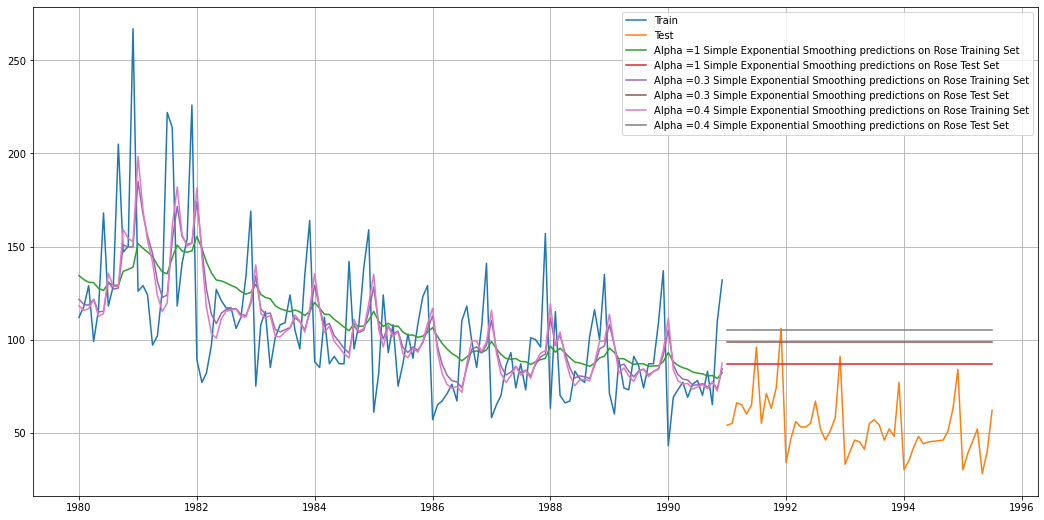

In [288]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train_rose['Rose'], label='Train')
plt.plot(SES_test_rose['Rose'], label='Test')

plt.plot(SES_train_rose['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Rose Training Set')
plt.plot(SES_test_rose['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Rose Test Set')

plt.plot(SES_train_rose['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Rose Training Set')
plt.plot(SES_test_rose['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Rose Test Set')

plt.plot(SES_train_rose['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Rose Training Set')
plt.plot(SES_test_rose['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Rose Test Set')


plt.legend(loc='best')
plt.grid();

In [289]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i_spark = model_SES_spark.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train_spark['predict',i] = model_SES_alpha_i_spark.fittedvalues
    SES_test_spark['predict',i] = model_SES_alpha_i_spark.forecast(steps=55)
    
    rmse_model5_train_i_spark = metrics.mean_squared_error(SES_train_spark['Sparkling'],SES_train_spark['predict',i],squared=False)
    
    rmse_model5_test_i_spark = metrics.mean_squared_error(SES_test_spark['Sparkling'],SES_test_spark['predict',i],squared=False)
    
    resultsDf_6_spark = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i_spark 
                                      ,'Test RMSE':rmse_model5_test_i_spark}, ignore_index=True)

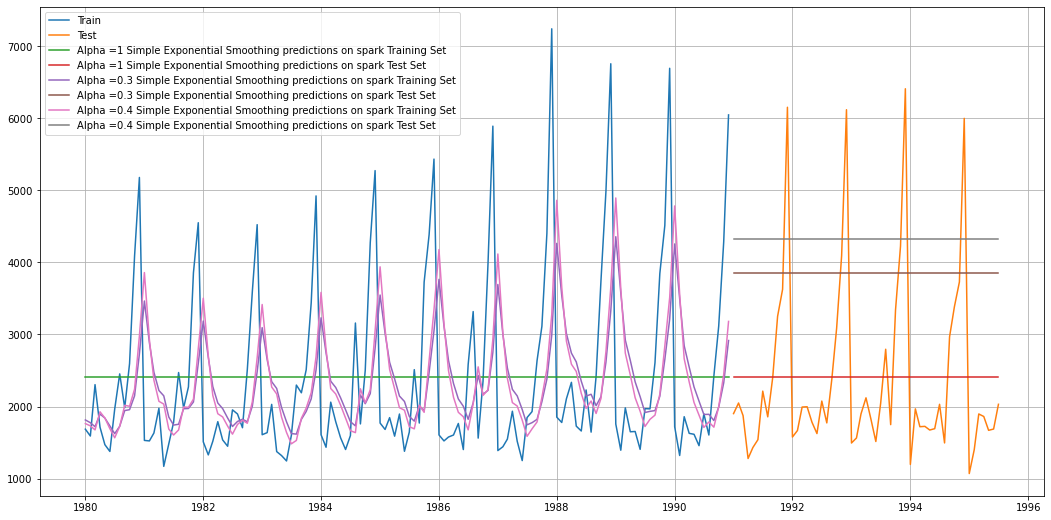

In [291]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train_spark['Sparkling'], label='Train')
plt.plot(SES_test_spark['Sparkling'], label='Test')

plt.plot(SES_train_spark['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on spark Training Set')
plt.plot(SES_test_spark['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on spark Test Set')

plt.plot(SES_train_spark['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on spark Training Set')
plt.plot(SES_test_spark['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on spark Test Set')

plt.plot(SES_train_spark['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on spark Training Set')
plt.plot(SES_test_spark['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on spark Test Set')


plt.legend(loc='best')
plt.grid();

In [410]:
resultsDf_rose6=pd.DataFrame({'Test RMSE-Rose Data':[resultsDf_6_rose['Test RMSE'][0], resultsDf_6_rose['Test RMSE'][0]]},\
                             index=['Alpha=0.3,SimpleExponentialSmoothingRose','Alpha=0.4,SimpleExponentialSmoothingRose'])
resultsDf_rose =pd.concat([resultsDf_rose, resultsDf_rose6])
resultsDf_rose

,Test RMSE-Rose Data
RegressionOnTime,1267.516575
Naive,17.740511
SimpleAvg,15.759889
2pointTrailingMovingAverageRose,11.529278
4pointTrailingMovingAverageRose,14.451433
6pointTrailingMovingAverageRose,14.566399
9pointTrailingMovingAverageRose,14.727667
"Alpha=1,SimpleExponentialSmoothing",36.796465
"Alpha=0.3,SimpleExponentialSmoothingRose",77.139491
"Alpha=0.4,SimpleExponentialSmoothingRose",77.139491


In [411]:
resultsDf_spark6=pd.DataFrame({'Test RMSE-Spark Data':[resultsDf_6_spark['Test RMSE'][0], resultsDf_6_spark['Test RMSE'][0]]},\
                             index=['Alpha=0.3,SimpleExponentialSmoothingspark','Alpha=0.4,SimpleExponentialSmoothingspark'])
resultsDf_spark =pd.concat([resultsDf_spark, resultsDf_spark6])
resultsDf_spark 

,Test RMSE-Spark Data
RegressionOnTime,1389.249047
Naive,1327.156057
SimpleAvg,1275.073380
2pointTrailingMovingAveragespark,813.400684
4pointTrailingMovingAveragespark,1156.589694
6pointTrailingMovingAveragespark,1283.927428
9pointTrailingMovingAveragespark,1346.278315
"Alpha=1,SimpleExponentialSmoothing",1275.081839
"Alpha=0.3,SimpleExponentialSmoothingspark",3686.794285
"Alpha=0.4,SimpleExponentialSmoothingspark",3686.794285


### Model 6 : Holt's Model

In [298]:
DES_train_rose = train_rose.copy()
DES_test_rose = test_rose.copy()

In [299]:
DES_train_spark = train_spark.copy()
DES_test_spark = test_spark.copy()

In [301]:
model_DES_rose = Holt(DES_train_rose['Rose'])
model_DES_spark = Holt(DES_train_spark['Sparkling'])

In [303]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_rose = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[]
                                ,'Test RMSE': []})
resultsDf_7_rose

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [305]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_spark = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[]
                                ,'Test RMSE': []})
resultsDf_7_spark

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [308]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j_rose = model_DES_rose.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train_rose['predict',i,j] = model_DES_alpha_i_j_rose.fittedvalues
        DES_test_rose['predict',i,j] = model_DES_alpha_i_j_rose.forecast(steps=55)
        
        rmse_model6_train_rose = metrics.mean_squared_error(DES_train_rose['Rose'],DES_train_rose['predict',i,j],squared=False)
        
        rmse_model6_test_rose = metrics.mean_squared_error(DES_test_rose['Rose'],DES_test_rose['predict',i,j],squared=False)
        
        resultsDf_7_rose = resultsDf_7_rose.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train_rose
                                      ,'Test RMSE':rmse_model6_test_rose}, ignore_index=True)
resultsDf_7_rose

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,35.928003,265.567857
1,0.3,0.4,37.393239,358.751205
2,0.3,0.5,38.888325,451.810493
3,0.3,0.6,40.280670,536.954413
4,0.3,0.7,41.403518,601.616615
...,...,...,...,...
59,1.0,0.6,51.828562,801.680481
60,1.0,0.7,54.493671,841.892837
61,1.0,0.8,57.362069,853.965801
62,1.0,0.9,60.470112,834.711199


In [309]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j_spark = model_DES_spark.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train_spark['predict',i,j] = model_DES_alpha_i_j_spark.fittedvalues
        DES_test_spark['predict',i,j] = model_DES_alpha_i_j_spark.forecast(steps=55)
        
        rmse_model6_train_spark = metrics.mean_squared_error(DES_train_spark['Sparkling'],DES_train_spark['predict',i,j],squared=False)
        
        rmse_model6_test_spark = metrics.mean_squared_error(DES_test_spark['Sparkling'],DES_test_spark['predict',i,j],squared=False)
        
        resultsDf_7_spark = resultsDf_7_spark.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train_spark
                                      ,'Test RMSE':rmse_model6_test_spark}, ignore_index=True)
resultsDf_7_spark

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,1590.151687,18259.110704
1,0.3,0.4,1681.706138,26069.841401
2,0.3,0.5,1771.290968,34401.512440
3,0.3,0.6,1848.583857,42162.748095
4,0.3,0.7,1900.315419,47832.397419
...,...,...,...,...
59,1.0,0.6,1753.362277,49327.087977
60,1.0,0.7,1825.157068,52655.765663
61,1.0,0.8,1901.992950,55442.273880
62,1.0,0.9,1985.351410,57823.177011


In [310]:
resultsDf_7_rose.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,35.928003,265.567857
8,0.4,0.3,36.733732,339.306796
1,0.3,0.4,37.393239,358.751205
16,0.5,0.3,37.424080,394.272892
24,0.6,0.3,38.343309,439.296295


In [311]:
resultsDf_7_spark.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.3,1590.151687,18259.110704
8,0.4,0.3,1568.527730,23878.496940
1,0.3,0.4,1681.706138,26069.841401
16,0.5,0.3,1530.223975,27095.532414
24,0.6,0.3,1506.223120,29070.722592


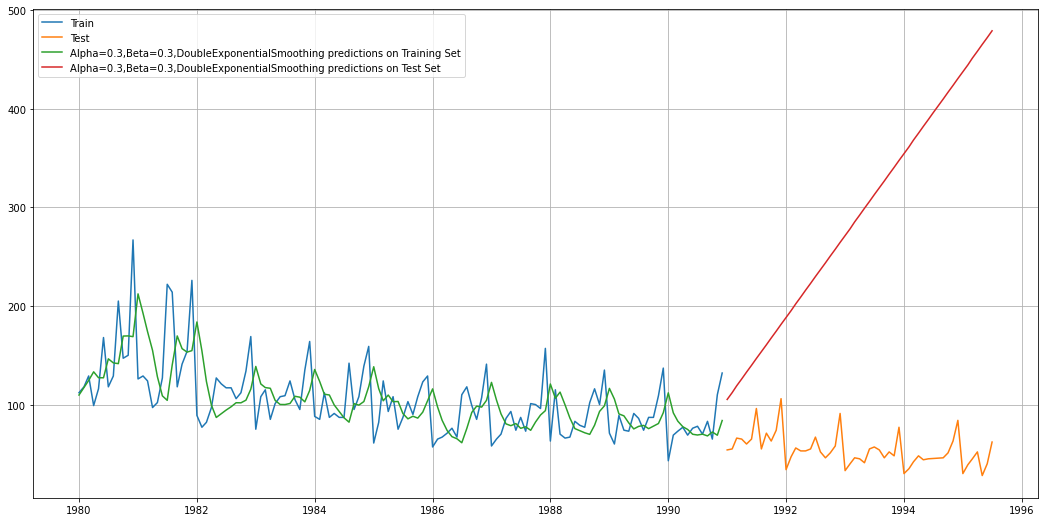

In [312]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train_rose['Rose'], label='Train')
plt.plot(DES_test_rose['Rose'], label='Test')

plt.plot(DES_train_rose['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test_rose['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

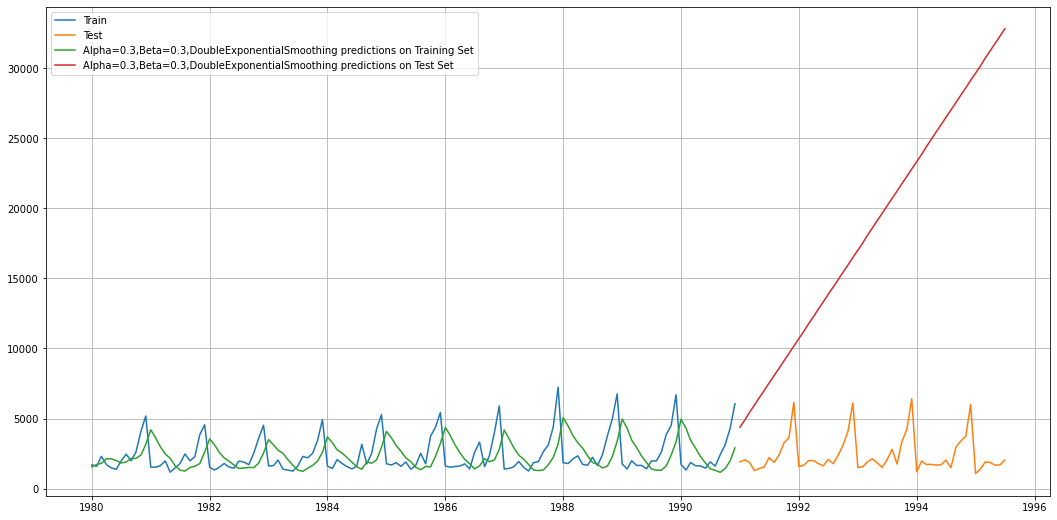

In [313]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train_spark['Sparkling'], label='Train')
plt.plot(DES_test_spark['Sparkling'], label='Test')

plt.plot(DES_train_spark['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test_spark['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [412]:
resultsDf_rose7=pd.DataFrame({'Test RMSE-Rose Data':resultsDf_7_rose['Test RMSE'][0]},\
                             index=['Alpha=0.3,Beta=0.3HoltzModelRose'])
resultsDf_rose =pd.concat([resultsDf_rose, resultsDf_rose7])
resultsDf_rose 

,Test RMSE-Rose Data
RegressionOnTime,1267.516575
Naive,17.740511
SimpleAvg,15.759889
2pointTrailingMovingAverageRose,11.529278
4pointTrailingMovingAverageRose,14.451433
6pointTrailingMovingAverageRose,14.566399
9pointTrailingMovingAverageRose,14.727667
"Alpha=1,SimpleExponentialSmoothing",36.796465
"Alpha=0.3,SimpleExponentialSmoothingRose",77.139491
"Alpha=0.4,SimpleExponentialSmoothingRose",77.139491


In [413]:
resultsDf_spark7=pd.DataFrame({'Test RMSE-Spark Data':resultsDf_7_spark['Test RMSE'][0]},\
                             index=['Alpha=0.3,Beta=0.3HoltzModelspark'])
resultsDf_spark =pd.concat([resultsDf_spark, resultsDf_spark7])
resultsDf_spark 

,Test RMSE-Spark Data
RegressionOnTime,1389.249047
Naive,1327.156057
SimpleAvg,1275.073380
2pointTrailingMovingAveragespark,813.400684
4pointTrailingMovingAveragespark,1156.589694
6pointTrailingMovingAveragespark,1283.927428
9pointTrailingMovingAveragespark,1346.278315
"Alpha=1,SimpleExponentialSmoothing",1275.081839
"Alpha=0.3,SimpleExponentialSmoothingspark",3686.794285
"Alpha=0.4,SimpleExponentialSmoothingspark",3686.794285


### Model 7 : Holtz Winter Model

In [325]:
TES_train_rose = train_rose.copy()
TES_test_rose = test_rose.copy()
TES_test_rose.drop(['Time'],inplace=True,axis=1)
TES_train_rose.drop(['Time'],inplace=True,axis=1)

In [326]:
TES_train_spark = train_spark.copy()
TES_test_spark = test_spark.copy()
TES_test_spark.drop(['Time'],inplace=True,axis=1)
TES_train_spark.drop(['Time'],inplace=True,axis=1)

In [330]:
model_TES_rose = ExponentialSmoothing(TES_train_rose['Rose'],trend='additive',seasonal='multiplicative')
model_TES_spark = ExponentialSmoothing(TES_train_spark['Sparkling'],trend='additive',seasonal='multiplicative')

In [331]:
model_TES_autofit_rose = model_TES_rose.fit()
model_TES_autofit_spark = model_TES_spark.fit()

In [336]:
model_TES_autofit_rose.params

{'smoothing_level': 0.10609630896598816,
 'smoothing_slope': 0.048438506611339596,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 76.65565108239777,
 'initial_slope': 0.0,
 'initial_seasons': array([1.47550257, 1.65927135, 1.80572621, 1.58888812, 1.77822689,
        1.92604353, 2.11649443, 2.25135182, 2.11690561, 2.08112817,
        2.4092726 , 3.30448096]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [337]:
model_TES_autofit_spark.params

{'smoothing_level': 0.15422215345902165,
 'smoothing_slope': 2.6836273360597693e-21,
 'smoothing_seasonal': 0.37132238239976756,
 'damping_slope': nan,
 'initial_level': 1639.9993318334934,
 'initial_slope': 4.848983218641197,
 'initial_seasons': array([1.00842014, 0.96898448, 1.24179403, 1.1320575 , 0.93981009,
        0.93811201, 1.2245818 , 1.54428852, 1.27336069, 1.6319816 ,
        2.48292921, 3.11861884]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [332]:
TES_train_rose['auto_predict'] = model_TES_autofit_rose.fittedvalues
TES_train_rose.head()

,Rose,auto_predict
YearMonth,,
1980-01-01,112.0,113.105610
1980-02-01,118.0,127.054225
1980-03-01,129.0,137.165611
1980-04-01,99.0,119.844363
1980-05-01,116.0,131.432564


In [333]:
TES_train_spark['auto_predict'] = model_TES_autofit_spark.fittedvalues
TES_train_spark.head()

,Sparkling,auto_predict
YearMonth,,
1980-01-01,1686,1658.698167
1980-02-01,1591,1602.576960
1980-03-01,2304,2057.502579
1980-04-01,1712,1915.827715
1980-05-01,1471,1568.940140


In [344]:
TES_test_rose['auto_predict'] = model_TES_autofit_rose.forecast(steps=55)
TES_test_rose.head()

,Rose,auto_predict
YearMonth,,
1991-01-01,54.0,56.674339
1991-02-01,55.0,63.471277
1991-03-01,66.0,68.788790
1991-04-01,65.0,60.277828
1991-05-01,60.0,67.180379


In [345]:
TES_test_spark['auto_predict'] = model_TES_autofit_spark.forecast(steps=55)
TES_test_spark.head()

,Sparkling,auto_predict
YearMonth,,
1991-01-01,1902,1602.190344
1991-02-01,2049,1373.887030
1991-03-01,1874,1807.440446
1991-04-01,1279,1704.576312
1991-05-01,1432,1602.379889


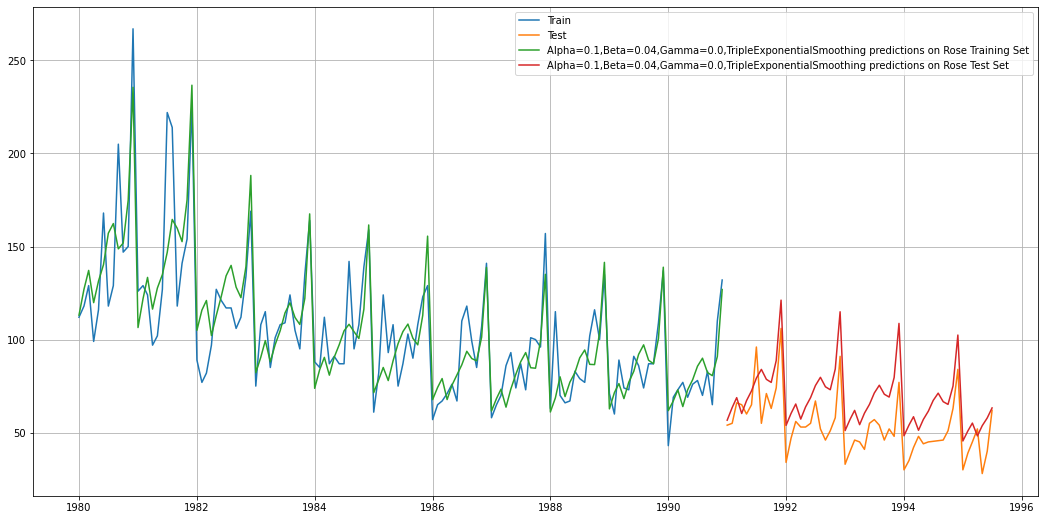

In [346]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train_rose['Rose'], label='Train')
plt.plot(TES_test_rose['Rose'], label='Test')

plt.plot(TES_train_rose['auto_predict'], label='Alpha=0.1,Beta=0.04,Gamma=0.0,TripleExponentialSmoothing predictions on Rose Training Set')
plt.plot(TES_test_rose['auto_predict'], label='Alpha=0.1,Beta=0.04,Gamma=0.0,TripleExponentialSmoothing predictions on Rose Test Set')


plt.legend(loc='best')
plt.grid();

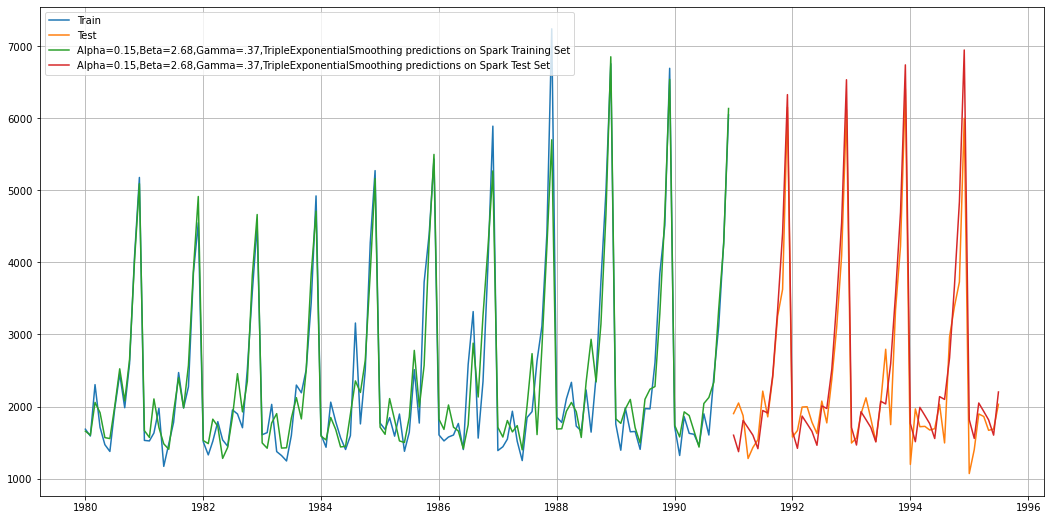

In [347]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train_spark['Sparkling'], label='Train')
plt.plot(TES_test_spark['Sparkling'], label='Test')

plt.plot(TES_train_spark['auto_predict'], label='Alpha=0.15,Beta=2.68,Gamma=.37,TripleExponentialSmoothing predictions on Spark Training Set')
plt.plot(TES_test_spark['auto_predict'], label='Alpha=0.15,Beta=2.68,Gamma=.37,TripleExponentialSmoothing predictions on Spark Test Set')


plt.legend(loc='best')
plt.grid();

In [414]:
rmse_model7_test_rose1 = metrics.mean_squared_error(TES_test_rose['Rose'],TES_test_rose['auto_predict'],squared=False)

In [417]:
resultsDf_8_rose1 = pd.DataFrame({'Test RMSE-Rose Data': [rmse_model7_test_rose1]}
                           ,index=['Alpha=0.684,Beta=0.052,Gamma=0.315,TripleExponentialSmoothing'])
resultsDf_rose=pd.concat([resultsDf_rose, resultsDf_8_rose1])
resultsDf_rose

,Test RMSE-Rose Data
RegressionOnTime,1267.516575
Naive,17.740511
SimpleAvg,15.759889
2pointTrailingMovingAverageRose,11.529278
4pointTrailingMovingAverageRose,14.451433
6pointTrailingMovingAverageRose,14.566399
9pointTrailingMovingAverageRose,14.727667
"Alpha=1,SimpleExponentialSmoothing",36.796465
"Alpha=0.3,SimpleExponentialSmoothingRose",77.139491
"Alpha=0.4,SimpleExponentialSmoothingRose",77.139491


In [420]:
rmse_model7_test_spark1 = metrics.mean_squared_error(TES_test_spark['Sparkling'],TES_test_spark['auto_predict'],squared=False)

In [423]:
resultsDf_8_spark1 = pd.DataFrame({'Test RMSE-Spark Data': [rmse_model7_test_spark1]}
                           ,index=['Alpha=0.15,Beta=2.68,Gamma=.37,TripleExponentialSmoothing'])
resultsDf_spark=pd.concat([resultsDf_spark, resultsDf_8_spark1])
resultsDf_spark

,Test RMSE-Spark Data
RegressionOnTime,1389.249047
Naive,1327.156057
SimpleAvg,1275.073380
2pointTrailingMovingAveragespark,813.400684
4pointTrailingMovingAveragespark,1156.589694
6pointTrailingMovingAveragespark,1283.927428
9pointTrailingMovingAveragespark,1346.278315
"Alpha=1,SimpleExponentialSmoothing",1275.081839
"Alpha=0.3,SimpleExponentialSmoothingspark",3686.794285
"Alpha=0.4,SimpleExponentialSmoothingspark",3686.794285


-----

### Check for Stationarity

In [424]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

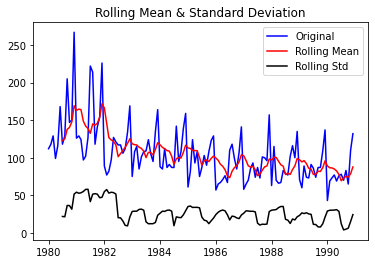

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [425]:
test_stationarity(train_rose['Rose'])

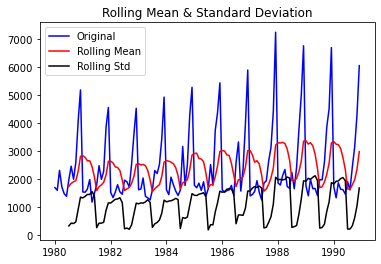

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [426]:
test_stationarity(train_spark['Sparkling'])

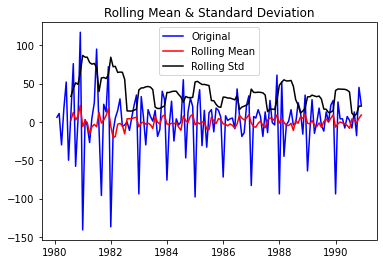

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [428]:
test_stationarity(train_rose['Rose'].diff().dropna())

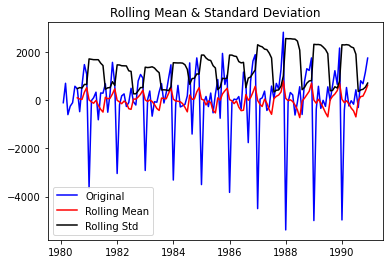

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [429]:
test_stationarity(train_spark['Sparkling'].diff().dropna())

In [430]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 5)
Model: (0, 0, 1)(0, 0, 2, 5)
Model: (0, 0, 2)(1, 0, 0, 5)
Model: (0, 0, 2)(1, 0, 1, 5)


In [440]:
ARIMA_AIC_rose = pd.DataFrame(columns=['param_rose', 'AIC'])
ARIMA_AIC_spark = pd.DataFrame(columns=['param_spark', 'AIC'])

In [441]:
ARIMA_AIC_rose

,param_rose,AIC


In [442]:
ARIMA_AIC_spark

,param_spark,AIC


### Building Automated ARIMA

In [465]:

from statsmodels.tsa.arima_model import ARIMA

for param_rose in pdq:
    ARIMA_model_rose = ARIMA(train_rose['Rose'].diff().dropna().values,order=param_rose).fit()
    print('ARIMA{} - AIC:{}'.format(param_rose,ARIMA_model_rose.aic))
    ARIMA_AIC_rose = ARIMA_AIC_rose.append({'param_rose':param_rose, 'AIC': ARIMA_model_rose.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:1335.1526583086775
ARIMA(0, 0, 1) - AIC:1280.7261830464045
ARIMA(0, 0, 2) - AIC:1276.8353720852406
ARIMA(1, 0, 0) - AIC:1319.348310580188
ARIMA(1, 0, 1) - AIC:1277.775747885047
ARIMA(1, 0, 2) - AIC:1277.3592217495348
ARIMA(2, 0, 0) - AIC:1300.6092611747547
ARIMA(2, 0, 1) - AIC:1279.045689409309
ARIMA(2, 0, 2) - AIC:1279.2986939365824


In [466]:
ARIMA_AIC_rose.sort_values(by='AIC',ascending=True)

,param_rose,AIC
11,"(0, 0, 2)",1276.835372
14,"(1, 0, 2)",1277.359222
13,"(1, 0, 1)",1277.775748
16,"(2, 0, 1)",1279.045689
17,"(2, 0, 2)",1279.298694
10,"(0, 0, 1)",1280.726183
5,"(1, 0, 2)",1292.053210
8,"(2, 0, 2)",1292.248055
7,"(2, 0, 1)",1292.937195
4,"(1, 0, 1)",1294.510585


In [468]:
for param_spark in pdq:
    ARIMA_model_spark = ARIMA(train_spark['Sparkling'].diff().dropna().values,order=param_spark).fit()
    print('ARIMA{} - AIC:{}'.format(param_spark,ARIMA_model_spark.aic))
    ARIMA_AIC_spark = ARIMA_AIC_spark.append({'param_spark':param_spark, 'AIC': ARIMA_model_spark.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:2269.582796371201
ARIMA(0, 0, 1) - AIC:2264.906437173329
ARIMA(0, 0, 2) - AIC:2232.783097684734
ARIMA(1, 0, 0) - AIC:2268.5280606863257
ARIMA(1, 0, 1) - AIC:2235.0139453501597
ARIMA(1, 0, 2) - AIC:2233.597647119585
ARIMA(2, 0, 0) - AIC:2262.035600081614
ARIMA(2, 0, 1) - AIC:2232.3604898890007
ARIMA(2, 0, 2) - AIC:2210.62306717763


In [469]:
ARIMA_AIC_spark.sort_values(by='AIC',ascending=True)

,param_spark,AIC
8,"(2, 0, 2)",2201.092654
17,"(2, 0, 2)",2210.623067
16,"(2, 0, 1)",2232.360490
11,"(0, 0, 2)",2232.783098
14,"(1, 0, 2)",2233.597647
13,"(1, 0, 1)",2235.013945
7,"(2, 0, 1)",2236.590818
6,"(2, 0, 0)",2244.799915
1,"(0, 0, 1)",2245.268851
2,"(0, 0, 2)",2245.343218


**Using optimal parameter for Rose(0,0,2) and Spark Wine(2,0,2)**

In [470]:
auto_ARIMA_rose = ARIMA(train_rose['Rose'].diff().dropna(), order=(0,0,2))

results_auto_ARIMA_rose = auto_ARIMA_rose.fit()

print(results_auto_ARIMA_rose.summary())

                              ARMA Model Results                              
Dep. Variable:                   Rose   No. Observations:                  131
Model:                     ARMA(0, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sun, 13 Sep 2020   AIC                           1276.835
Time:                        15:07:46   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.Rose    -0.2398      0.095     -2.518      0.0

In [471]:
auto_ARIMA_spark = ARIMA(train_spark['Sparkling'].diff().dropna(), order=(2,0,2))

results_auto_ARIMA_spark = auto_ARIMA_spark.fit()

print(results_auto_ARIMA_spark.summary())

                              ARMA Model Results                              
Dep. Variable:              Sparkling   No. Observations:                  131
Model:                     ARMA(2, 2)   Log Likelihood               -1099.312
Method:                       css-mle   S.D. of innovations           1013.526
Date:                Sun, 13 Sep 2020   AIC                           2210.623
Time:                        15:08:14   BIC                           2227.874
Sample:                    02-01-1980   HQIC                          2217.633
                         - 12-01-1990                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.5837      0.519     10.757      0.000       4.566       6.601
ar.L1.Sparkling     1.2699      0.075     17.042      0.000       1.124       1.416
ar.L2.Sparkling    -0.5602      

In [472]:
predicted_auto_ARIMA_rose = results_auto_ARIMA_rose.forecast(steps=len(test_rose))

In [473]:
predicted_auto_ARIMA_spark = results_auto_ARIMA_spark.forecast(steps=len(test_spark))

In [474]:
rmse_model9_test_rose1 = metrics.mean_squared_error(test_rose['Rose'],predicted_auto_ARIMA_rose[0],squared=False)
rmse_model9_test_spark1 = metrics.mean_squared_error(test_spark['Sparkling'],predicted_auto_ARIMA_spark[0],squared=False)

In [477]:
resultsDf_9_rose1 = pd.DataFrame({'Test RMSE-Rose Data': [rmse_model9_test_rose1]}
                           ,index=['ARIMA(0,0,2)'])
resultsDf_rose=pd.concat([resultsDf_rose, resultsDf_9_rose1])
resultsDf_rose

,Test RMSE-Rose Data
RegressionOnTime,1267.516575
Naive,17.740511
SimpleAvg,15.759889
2pointTrailingMovingAverageRose,11.529278
4pointTrailingMovingAverageRose,14.451433
6pointTrailingMovingAverageRose,14.566399
9pointTrailingMovingAverageRose,14.727667
"Alpha=1,SimpleExponentialSmoothing",36.796465
"Alpha=0.3,SimpleExponentialSmoothingRose",77.139491
"Alpha=0.4,SimpleExponentialSmoothingRose",77.139491


In [478]:
resultsDf_9_spark1 = pd.DataFrame({'Test RMSE-Spark Data': [rmse_model9_test_spark1]}
                           ,index=['ARIMA(2,0,2)'])
resultsDf_spark=pd.concat([resultsDf_spark, resultsDf_9_spark1])
resultsDf_spark

,Test RMSE-Spark Data
RegressionOnTime,1389.249047
Naive,1327.156057
SimpleAvg,1275.073380
2pointTrailingMovingAveragespark,813.400684
4pointTrailingMovingAveragespark,1156.589694
6pointTrailingMovingAveragespark,1283.927428
9pointTrailingMovingAveragespark,1346.278315
"Alpha=1,SimpleExponentialSmoothing",1275.081839
"Alpha=0.3,SimpleExponentialSmoothingspark",3686.794285
"Alpha=0.4,SimpleExponentialSmoothingspark",3686.794285


### Building an ARIMA based on PACF and ACF plots

In [481]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

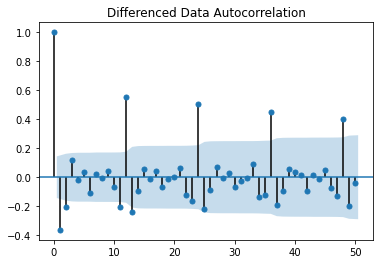

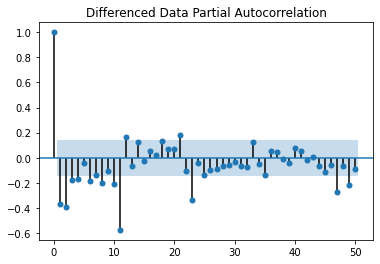

In [483]:
plot_acf(ts_rose.diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(ts_rose.diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

**PACF(p),ACF(q),diff(d) components for Rose Dataset are (p,d,q)-->(5,1,2)** 

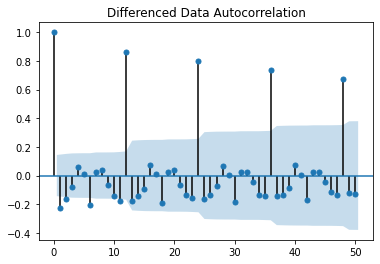

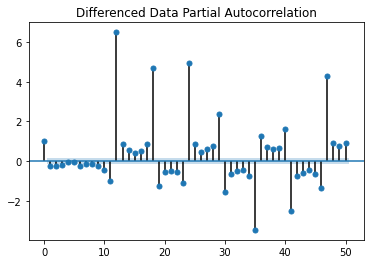

In [484]:
plot_acf(ts_spark.diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(ts_spark.diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

**PACF(p),ACF(q),diff(d) components for Sparkling Dataset are (p,d,q)-->(1,1,2), since PACF plot significant region is too small we are assuming that from 2nd vertical line it is getting cut-off** 

In [485]:
manual_ARIMA_rose = ARIMA(train_rose['Rose'], order=(5,1,2))

results_manual_ARIMA_rose = manual_ARIMA_rose.fit()

print(results_manual_ARIMA_rose.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -633.567
Method:                       css-mle   S.D. of innovations             29.962
Date:                Sun, 13 Sep 2020   AIC                           1285.134
Time:                        15:27:18   BIC                           1311.011
Sample:                    02-01-1980   HQIC                          1295.649
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4903      0.084     -5.841      0.000      -0.655      -0.326
ar.L1.D.Rose    -0.7739      0.088     -8.840      0.000      -0.945      -0.602
ar.L2.D.Rose     0.1243      0.102      1.21

In [488]:
predicted_manual_ARIMA_rose = results_manual_ARIMA_rose.forecast(steps=len(test_spark))

In [490]:
manual_ARIMA_spark = ARIMA(train_spark['Sparkling'], order=(1,1,2))

results_manual_ARIMA_spark = manual_ARIMA_spark.fit()

print(results_manual_ARIMA_spark.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1111.799
Method:                       css-mle   S.D. of innovations           1155.290
Date:                Sun, 13 Sep 2020   AIC                           2233.598
Time:                        15:29:52   BIC                           2247.974
Sample:                    02-01-1980   HQIC                          2239.439
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.4579      4.211      1.534      0.125      -1.795      14.711
ar.L1.D.Sparkling     0.1896      0.166      1.143      0.253      -0.135       0.515
ma.L1.D.Sparkling    -0.

In [491]:
predicted_manual_ARIMA_spark = results_manual_ARIMA_spark.forecast(steps=len(test_spark))

In [492]:
rmse_model10_test_rose1=metrics.mean_squared_error(test_rose['Rose'],predicted_manual_ARIMA_rose[0],squared=False)
rmse_model10_test_spark1=metrics.mean_squared_error(test_spark['Sparkling'],predicted_manual_ARIMA_spark[0],squared=False)

In [495]:
resultsDf_10_rose1 = pd.DataFrame({'Test RMSE-Rose Data': [rmse_model10_test_rose1]}
                           ,index=['Manual ARIMA(5,1,2)'])
resultsDf_rose=pd.concat([resultsDf_rose, resultsDf_10_rose1])
resultsDf_rose

,Test RMSE-Rose Data
RegressionOnTime,1267.516575
Naive,17.740511
SimpleAvg,15.759889
2pointTrailingMovingAverageRose,11.529278
4pointTrailingMovingAverageRose,14.451433
6pointTrailingMovingAverageRose,14.566399
9pointTrailingMovingAverageRose,14.727667
"Alpha=1,SimpleExponentialSmoothing",36.796465
"Alpha=0.3,SimpleExponentialSmoothingRose",77.139491
"Alpha=0.4,SimpleExponentialSmoothingRose",77.139491


In [497]:
resultsDf_10_spark1 = pd.DataFrame({'Test RMSE-Spark Data': [rmse_model10_test_spark1]}
                           ,index=['Manual ARIMA(1,1,2)'])
resultsDf_spark=pd.concat([resultsDf_spark, resultsDf_10_spark1])
resultsDf_spark

,Test RMSE-Spark Data
RegressionOnTime,1389.249047
Naive,1327.156057
SimpleAvg,1275.073380
2pointTrailingMovingAveragespark,813.400684
4pointTrailingMovingAveragespark,1156.589694
6pointTrailingMovingAveragespark,1283.927428
9pointTrailingMovingAveragespark,1346.278315
"Alpha=1,SimpleExponentialSmoothing",1275.081839
"Alpha=0.3,SimpleExponentialSmoothingspark",3686.794285
"Alpha=0.4,SimpleExponentialSmoothingspark",3686.794285


### Building Automated SARIMA model

In [498]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [499]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose

,param,seasonal,AIC


In [500]:
SARIMA_AIC_spark = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_spark

,param,seasonal,AIC


In [501]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6)7 - AIC:1264.4996261104893
SARIMA(0, 1, 0)x(0, 0, 2, 6)7 - AIC:1144.7077471821196
SARIMA(0, 1, 0)x(1, 0, 0, 6)7 - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6)7 - AIC:1241.787094512455
SARIMA(0, 1, 0)x(1, 0, 2, 6)7 - AIC:1146.309326670193
SARIMA(0, 1, 0)x(2, 0, 0, 6)7 - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6)7 - AIC:1137.4533629405073
SARIMA(0, 1, 0)x(2, 0, 2, 6)7 - AIC:1117.0224424602293
SARIMA(0, 1, 1)x(0, 0, 0, 6)7 - AIC:1263.536909726377
SARIMA(0, 1, 1)x(0, 0, 1, 6)7 - AIC:1201.383254801385
SARIMA(0, 1, 1)x(0, 0, 2, 6)7 - AIC:1097.1908217817181
SARIMA(0, 1, 1)x(1, 0, 0, 6)7 - AIC:1222.435473575784
SARIMA(0, 1, 1)x(1, 0, 1, 6)7 - AIC:1160.4386253540338
SARIMA(0, 1, 1)x(1, 0, 2, 6)7 - AIC:1085.0930138894616
SARIMA(0, 1, 1)x(2, 0, 0, 6)7 - AIC:1095.7490380128843
SARIMA(0, 1, 1)x(2, 0, 1, 6)7 - AIC:1097.6455026279618
SARIMA(0, 1, 1)x(2, 0, 2, 6)7 - AIC:1053.0044075906712
SARIMA(0, 1, 2)

In [502]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_spark = sm.tsa.statespace.SARIMAX(train_spark['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_spark = SARIMA_model_spark.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_spark.aic))
        SARIMA_AIC_spark = SARIMA_AIC_spark.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_spark.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6)7 - AIC:2152.3780760934624
SARIMA(0, 1, 0)x(0, 0, 2, 6)7 - AIC:1955.6355536916822
SARIMA(0, 1, 0)x(1, 0, 0, 6)7 - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6)7 - AIC:2079.5599880284913
SARIMA(0, 1, 0)x(1, 0, 2, 6)7 - AIC:1926.9360111419785
SARIMA(0, 1, 0)x(2, 0, 0, 6)7 - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6)7 - AIC:1841.1993618159836
SARIMA(0, 1, 0)x(2, 0, 2, 6)7 - AIC:1810.9177811029806
SARIMA(0, 1, 1)x(0, 0, 0, 6)7 - AIC:2230.1629078505994
SARIMA(0, 1, 1)x(0, 0, 1, 6)7 - AIC:2130.5652859089773
SARIMA(0, 1, 1)x(0, 0, 2, 6)7 - AIC:1918.174158079246
SARIMA(0, 1, 1)x(1, 0, 0, 6)7 - AIC:2139.5733191809136
SARIMA(0, 1, 1)x(1, 0, 1, 6)7 - AIC:2006.5174298480717
SARIMA(0, 1, 1)x(1, 0, 2, 6)7 - AIC:1855.707554600435
SARIMA(0, 1, 1)x(2, 0, 0, 6)7 - AIC:1798.7885104880188
SARIMA(0, 1, 1)x(2, 0, 1, 6)7 - AIC:1800.7726196336857
SARIMA(0, 1, 1)x(2, 0, 2, 6)7 - AIC:1741.6473523956408
SARIMA(0, 1,

In [503]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1041.655817
26,"(0, 1, 2)","(2, 0, 2, 6)",1043.600261
80,"(2, 1, 2)","(2, 0, 2, 6)",1045.288112
71,"(2, 1, 1)","(2, 0, 2, 6)",1051.673461
44,"(1, 1, 1)","(2, 0, 2, 6)",1052.778469


In [504]:
SARIMA_AIC_spark.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1727.510410
26,"(0, 1, 2)","(2, 0, 2, 6)",1727.887985
17,"(0, 1, 1)","(2, 0, 2, 6)",1741.647352
71,"(2, 1, 1)","(2, 0, 2, 6)",1744.040750
80,"(2, 1, 2)","(2, 0, 2, 6)",1752.673959


In [505]:
auto_SARIMA_6_rose = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6_rose = auto_SARIMA_6_rose.fit(maxiter=1000)
print(results_auto_SARIMA_6_rose.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Sun, 13 Sep 2020   AIC                           1041.656
Time:                                   15:47:55   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5939      0.152     -3.899      0.000      -0.892      -0.295
ma.L1         -0.1954    238.206     -0.001

In [506]:
auto_SARIMA_6_spark = sm.tsa.statespace.SARIMAX(train_spark['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6_spark = auto_SARIMA_6_spark.fit(maxiter=1000)
print(results_auto_SARIMA_6_spark.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.755
Date:                           Sun, 13 Sep 2020   AIC                           1727.510
Time:                                   15:48:18   BIC                           1749.539
Sample:                                        0   HQIC                          1736.453
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6456      0.287     -2.250      0.024      -1.208      -0.083
ma.L1         -0.1063      0.251     -0.423

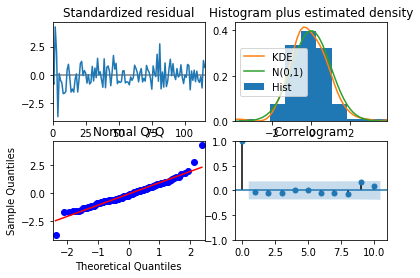

In [507]:
results_auto_SARIMA_6_rose.plot_diagnostics()
plt.show()

Diagonstics roughlty estimates the theoretical pattern, there is no significant trend/insights could be developed

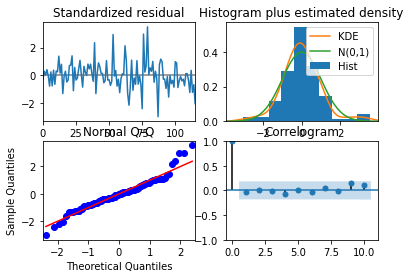

In [508]:
results_auto_SARIMA_6_spark.plot_diagnostics()
plt.show()

Diagonstics roughlty estimates the theoretical pattern, there is no significant trend/insights could be developed

In [510]:
predicted_auto_SARIMA_6_rose = results_auto_SARIMA_6_rose.get_forecast(steps=len(test_rose))

In [511]:
predicted_auto_SARIMA_6_rose.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.840820,18.848366,25.898702,99.782938
1,67.630213,19.300311,29.802299,105.458128
2,74.746177,19.412886,36.697621,112.794734
3,71.324986,19.475834,33.153053,109.496918
4,76.017067,19.484111,37.828911,114.205224


In [515]:
predicted_auto_SARIMA_6_spark = results_auto_SARIMA_6_spark.get_forecast(steps=len(test_spark))

In [516]:
predicted_auto_SARIMA_6_spark.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1329.911653,380.496817,584.151597,2075.671710
1,1177.176496,392.034687,408.802629,1945.550363
2,1624.610769,392.231202,855.851739,2393.369798
3,1544.422912,397.638747,765.065288,2323.780535
4,1306.364155,398.860250,524.612430,2088.115880


In [517]:
rmse_model11_test_rose1=metrics.mean_squared_error(test_rose['Rose'],predicted_auto_SARIMA_6_rose.predicted_mean,squared=False)

In [518]:
rmse_model11_test_spark1=metrics.mean_squared_error(test_spark['Sparkling'],predicted_auto_SARIMA_6_spark.predicted_mean,squared=False)

In [520]:
resultsDf_11_rose1 = pd.DataFrame({'Test RMSE-Rose Data': [rmse_model11_test_rose1]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])
resultsDf_rose=pd.concat([resultsDf_rose, resultsDf_11_rose1])
resultsDf_rose

,Test RMSE-Rose Data
RegressionOnTime,1267.516575
Naive,17.740511
SimpleAvg,15.759889
2pointTrailingMovingAverageRose,11.529278
4pointTrailingMovingAverageRose,14.451433
6pointTrailingMovingAverageRose,14.566399
9pointTrailingMovingAverageRose,14.727667
"Alpha=1,SimpleExponentialSmoothing",36.796465
"Alpha=0.3,SimpleExponentialSmoothingRose",77.139491
"Alpha=0.4,SimpleExponentialSmoothingRose",77.139491


In [522]:
resultsDf_11_spark1 = pd.DataFrame({'Test RMSE-Spark Data': [rmse_model11_test_spark1]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])
resultsDf_spark=pd.concat([resultsDf_spark, resultsDf_11_spark1])

In [523]:
resultsDf_spark

,Test RMSE-Spark Data
RegressionOnTime,1389.249047
Naive,1327.156057
SimpleAvg,1275.073380
2pointTrailingMovingAveragespark,813.400684
4pointTrailingMovingAveragespark,1156.589694
6pointTrailingMovingAveragespark,1283.927428
9pointTrailingMovingAveragespark,1346.278315
"Alpha=1,SimpleExponentialSmoothing",1275.081839
"Alpha=0.3,SimpleExponentialSmoothingspark",3686.794285
"Alpha=0.4,SimpleExponentialSmoothingspark",3686.794285


### Building Manual SARIMA

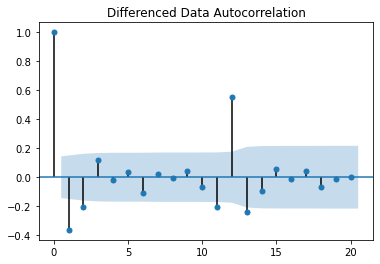

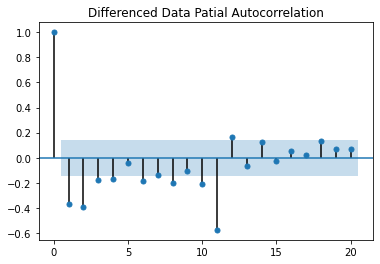

In [526]:
plot_acf(ts_rose.diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plot_pacf(ts_rose.diff().dropna(),lags=20,title='Differenced Data Patial Autocorrelation')
plt.show();

There is no obvious cyclicity of season observed from graph, so from given business data we will take lag as 6

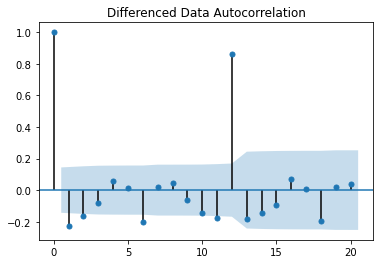

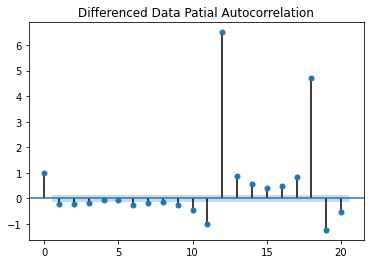

In [527]:
plot_acf(ts_spark.diff().dropna(),lags=20,title='Differenced Data Autocorrelation')
plot_pacf(ts_spark.diff().dropna(),lags=20,title='Differenced Data Patial Autocorrelation')
plt.show();

There is no obvious cyclicity of season observed from graph, so from given business data we will take lag as 6

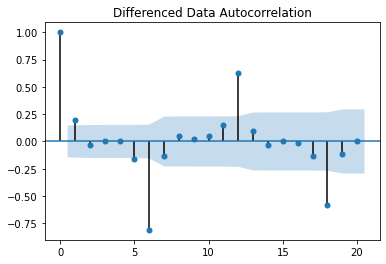

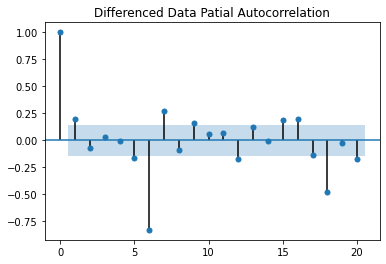

In [528]:
plot_acf(ts_rose.diff(6).dropna(),lags=20,title='Differenced Data Autocorrelation')
plot_pacf(ts_rose.diff(6).dropna(),lags=20,title='Differenced Data Patial Autocorrelation')
plt.show();

(p,d,q) same as ARIMA plot-->(5,1,2),Seasonal(p,d,q,s)-->(2,1,1,6)

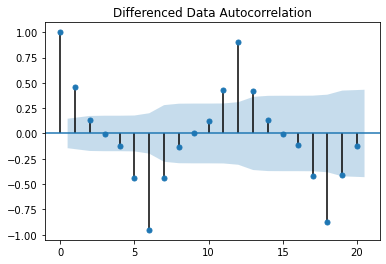

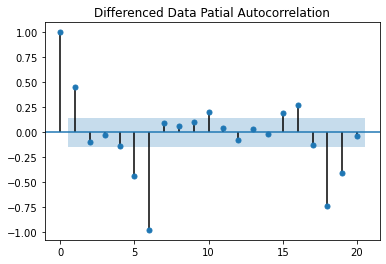

In [529]:
plot_acf(ts_spark.diff(6).dropna(),lags=20,title='Differenced Data Autocorrelation')
plot_pacf(ts_spark.diff(6).dropna(),lags=20,title='Differenced Data Patial Autocorrelation')
plt.show();

(p,d,q) same as ARIMA plot-->(1,1,2),Seasonal(p,d,q,s)-->(2,1,1,6)

In [530]:
manual_SARIMA_6_rose = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(5, 1, 2),
                                seasonal_order=(2, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6_rose = manual_SARIMA_6_rose.fit(maxiter=1000)
print(results_manual_SARIMA_6_rose.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(5, 1, 2)x(2, 1, [1], 6)   Log Likelihood                -474.187
Date:                             Sun, 13 Sep 2020   AIC                            970.373
Time:                                     16:31:56   BIC                            999.877
Sample:                                          0   HQIC                           982.336
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.1969      0.182    -12.081      0.000      -2.553      -1.840
ar.L2         -1.9398      

In [531]:
manual_SARIMA_6_spark = sm.tsa.statespace.SARIMAX(train_spark['Sparkling'].values,
                                order=(5, 1, 2),
                                seasonal_order=(2, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6_spark = manual_SARIMA_6_spark.fit(maxiter=1000)
print(results_manual_SARIMA_6_spark.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(5, 1, 2)x(2, 1, [1], 6)   Log Likelihood                -806.603
Date:                             Sun, 13 Sep 2020   AIC                           1635.206
Time:                                     16:32:04   BIC                           1664.710
Sample:                                          0   HQIC                          1647.169
                                             - 132                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8685      0.159     -5.465      0.000      -1.180      -0.557
ar.L2         -0.8977      

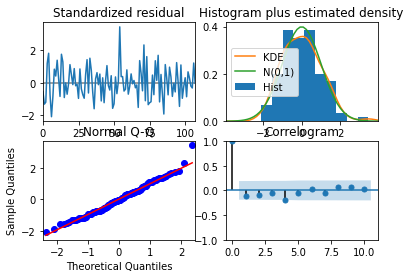

In [532]:
results_manual_SARIMA_6_rose.plot_diagnostics()
plt.show();

Diagonstics for Rose look good having residuals within range of (-2,2)

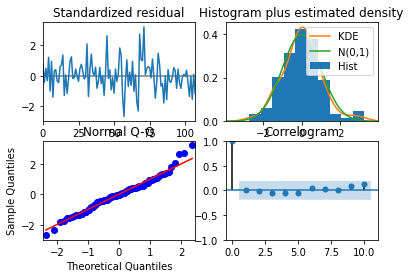

In [533]:
results_manual_SARIMA_6_spark.plot_diagnostics()
plt.show();

Diagonstics for Sparkling wine also looks good with less value of residuals 

In [534]:
predicted_manual_SARIMA_6_rose = results_manual_SARIMA_6_rose.get_forecast(steps=len(test_rose))

In [535]:
predicted_manual_SARIMA_6_spark = results_manual_SARIMA_6_spark.get_forecast(steps=len(test_spark))

In [536]:
rmse_model12_test_rose1=metrics.mean_squared_error(test_rose['Rose'],predicted_manual_SARIMA_6_rose.predicted_mean,squared=False)

In [537]:
rmse_model12_test_spark1=metrics.mean_squared_error(test_spark['Sparkling'],predicted_manual_SARIMA_6_spark.predicted_mean,squared=False)

In [539]:
resultsDf_12_rose1 = pd.DataFrame({'Test RMSE-Rose Data': [rmse_model12_test_rose1]}
                           ,index=['Manual SARIMA(5,1,2)(2,1,1,6)'])
resultsDf_rose=pd.concat([resultsDf_rose, resultsDf_12_rose1])
resultsDf_rose

,Test RMSE-Rose Data
RegressionOnTime,1267.516575
Naive,17.740511
SimpleAvg,15.759889
2pointTrailingMovingAverageRose,11.529278
4pointTrailingMovingAverageRose,14.451433
6pointTrailingMovingAverageRose,14.566399
9pointTrailingMovingAverageRose,14.727667
"Alpha=1,SimpleExponentialSmoothing",36.796465
"Alpha=0.3,SimpleExponentialSmoothingRose",77.139491
"Alpha=0.4,SimpleExponentialSmoothingRose",77.139491


In [542]:
resultsDf_12_spark1 = pd.DataFrame({'Test RMSE-Spark Data': [rmse_model12_test_spark1]}
                           ,index=['Manual SARIMA(1,1,2)(2,1,1,6)'])
resultsDf_spark=pd.concat([resultsDf_spark, resultsDf_12_spark1])
resultsDf_spark

,Test RMSE-Spark Data
RegressionOnTime,1389.249047
Naive,1327.156057
SimpleAvg,1275.073380
2pointTrailingMovingAveragespark,813.400684
4pointTrailingMovingAveragespark,1156.589694
6pointTrailingMovingAveragespark,1283.927428
9pointTrailingMovingAveragespark,1346.278315
"Alpha=1,SimpleExponentialSmoothing",1275.081839
"Alpha=0.3,SimpleExponentialSmoothingspark",3686.794285
"Alpha=0.4,SimpleExponentialSmoothingspark",3686.794285


### Using optimum model on Rose Dataset
**Eventhough Manual ARIMA performed well it does includes Sesonal component, we go for Automated SARIMA since it also includes cyclicity of the seasonality and moreover RMSE of the model is just 11 units higher that Manual ARIMA we could go for Automated SARIMA since the business objective is clear that involves seasonailty and cyclicity.** 

In [543]:
ts_df_rose=pd.DataFrame(ts_rose,index=ts_rose.index,columns=['Rose'])
ts_df_rose.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [544]:
ts_df_spark=pd.DataFrame(ts_spark,index=ts_spark.index,columns=['Sparkling'])
ts_df_spark.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


#### Using Automated SARIMA on Rose Dataset

In [559]:
SARIMA_final_rose = sm.tsa.statespace.SARIMAX(ts_df_rose['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Results_final_SARIMA_rose = SARIMA_final_rose.fit(maxiter=1000)
print(Results_final_SARIMA_rose.summary())

Results_final_SARIMA_rose = SARIMA_final_rose.fit()

print(Results_final_SARIMA_rose.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -734.147
Date:                           Sun, 13 Sep 2020   AIC                           1482.295
Time:                                   18:23:42   BIC                           1504.287
Sample:                               01-01-1980   HQIC                          1491.218
                                    - 07-01-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7297      0.071    -10.351      0.000      -0.868      -0.592
ma.L2         -0.1898      0.066     -2.882

In [560]:
Predicted_SARIMA_rose_final = Results_final_SARIMA_rose.forecast(steps=12)

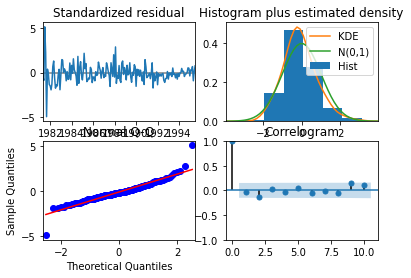

In [561]:
Results_final_SARIMA_rose.plot_diagnostics();

In [562]:
Predicted_SARIMA_rose = Results_final_SARIMA_rose.get_forecast(steps=12)

In [564]:
rmse_rose = metrics.mean_squared_error(ts_df_rose['Rose'],Results_final_SARIMA_rose.fittedvalues,squared=False)
print('RMSE of the Final Model',rmse_rose)

RMSE of the Final Model 28.051000974535224


In [565]:
pred_full_auto_SARIMA_date = Predicted_SARIMA_rose.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

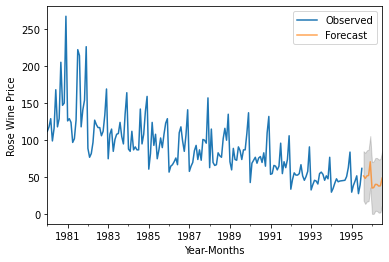

In [569]:
axis = ts_df_rose['Rose'].plot(label='Observed')
pred_full_auto_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_auto_SARIMA_date.index, pred_full_auto_SARIMA_date['mean_ci_lower'], 
                  pred_full_auto_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose Wine Price')
plt.legend(loc='best')
plt.show()

### Using optimum model on Sparkling Dataset

In [549]:
SARIMA_final_spark = sm.tsa.statespace.SARIMAX(ts_df_spark['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(2, 1, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
Results_final_SARIMA_spark = SARIMA_final_spark.fit(maxiter=1000)
print(Results_final_SARIMA_spark.summary())

                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(2, 1, [1], 6)   Log Likelihood               -1241.427
Date:                             Sun, 13 Sep 2020   AIC                           2496.853
Time:                                     18:08:15   BIC                           2518.679
Sample:                                 01-01-1980   HQIC                          2505.712
                                      - 07-01-1995                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8529      0.055    -15.593      0.000      -0.960      -0.746
ma.L1         -0.0008      

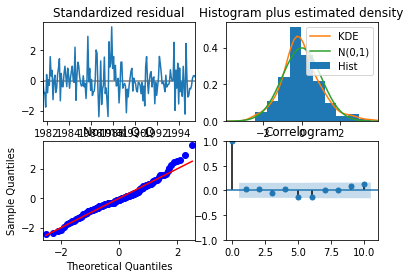

In [550]:
Results_final_SARIMA_spark.plot_diagnostics();

In [551]:
Predicted_SARIMA_spark = Results_final_SARIMA_spark.get_forecast(steps=12)

In [555]:
rmse_spark = metrics.mean_squared_error(ts_df_spark['Sparkling'],Results_final_SARIMA_spark.fittedvalues,squared=False)
print('RMSE of the Final Model',rmse_spark)

RMSE of the Final Model 600.572522314169


In [557]:
pred_full_manual_SARIMA_date = Predicted_SARIMA_spark.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

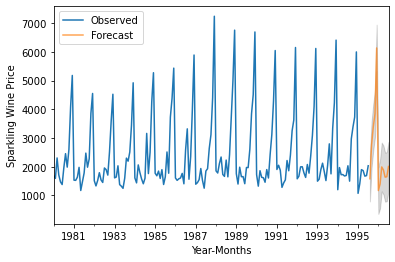

In [570]:
# plot the forecast along with the confidence band

axis = ts_df_spark['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling Wine Price')
plt.legend(loc='best')
plt.show()